<a href="https://colab.research.google.com/github/Alanyeo99/dummy/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime

# Read the data
url = 'https://raw.githubusercontent.com/holtzy/R-graph-gallery/master/DATA/bike.csv'
data = pd.read_csv(url, parse_dates=['datetime'], nrows=300)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for bike count
fig.add_trace(go.Scatter(x=data['datetime'], y=data['count'], mode='lines', name='Bike Count'), secondary_y=False)

# Update layout
fig.update_layout(title='Bike Rentals Time Series',
                  xaxis_title='Date',
                  yaxis_title='Bike Count')

# Add range selector buttons
fig.update_xaxes(rangeslider_visible=True)

# Show plot
fig.show()


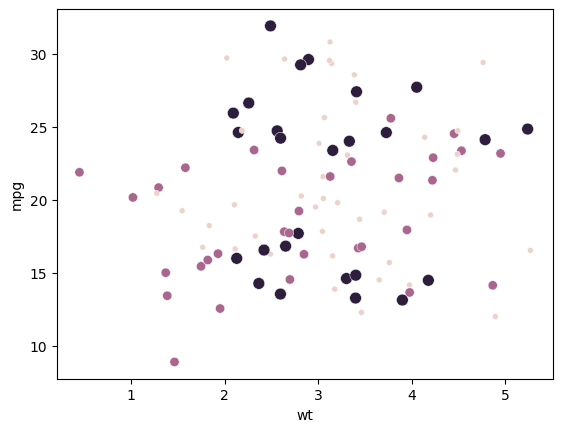

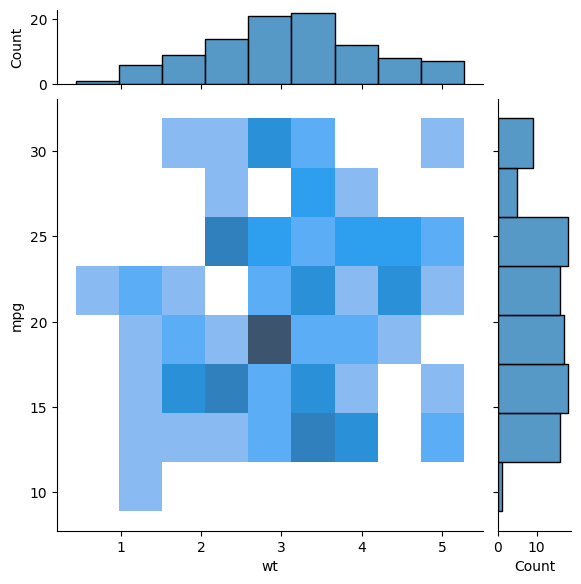

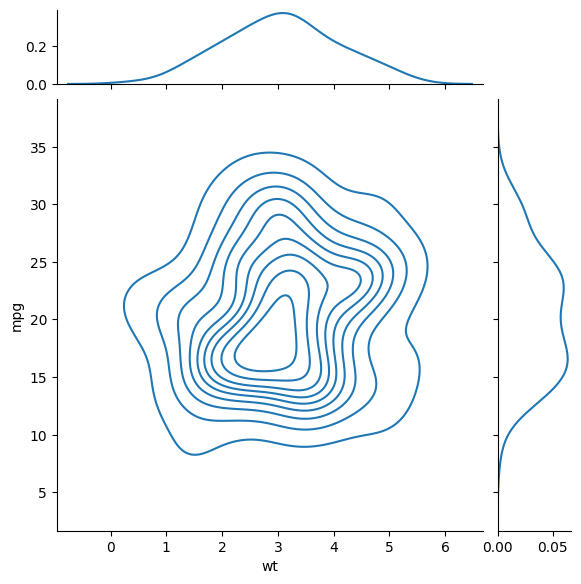

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create dummy data
np.random.seed(0)
data = pd.DataFrame({
    'wt': np.random.normal(3, 1, 100),
    'mpg': np.random.normal(20, 5, 100),
    'cyl': np.random.choice([4, 6, 8], 100)
})

# Classic scatter plot
p = sns.scatterplot(data=data, x="wt", y="mpg", hue="cyl", size="cyl")

# Hide the legend
p.legend_.remove()

# Create marginal histogram
p1 = sns.jointplot(data=data, x="wt", y="mpg", marginal_ticks=True, kind="hist")

# Create marginal density plot
p2 = sns.jointplot(data=data, x="wt", y="mpg", marginal_ticks=True, kind="kde")

# # Create marginal boxplot
# p3 = sns.jointplot(data=data, x="wt", y="mpg", marginal_ticks=True, kind="box")

plt.show()


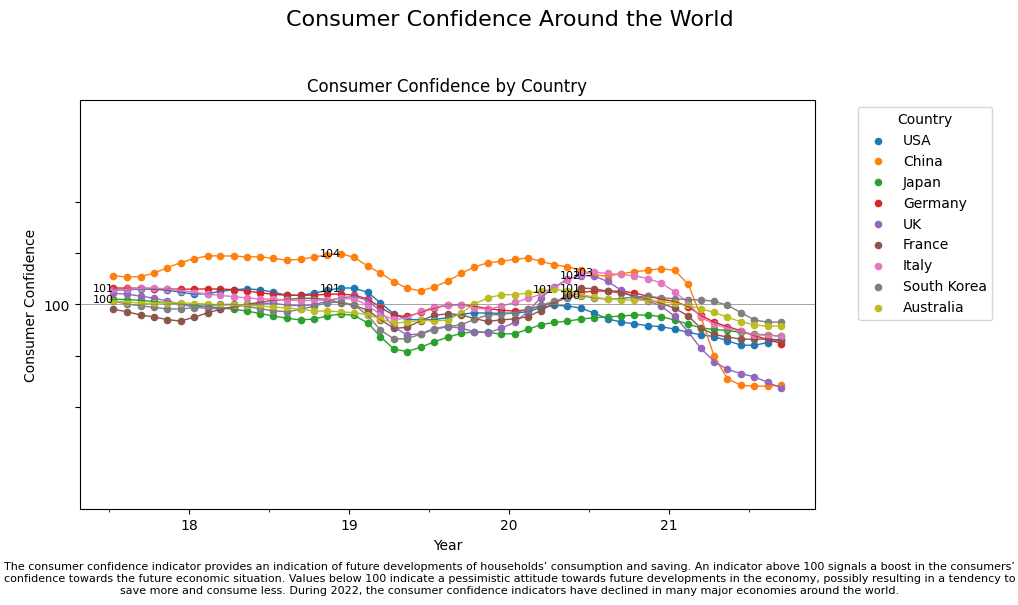

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from scipy import interpolate

# Load the data
url = "https://raw.githubusercontent.com/holtzy/R-graph-gallery/master/DATA/dataConsumerConfidence.csv"
df = pd.read_csv(url)

# Convert 'Time' column to datetime
df['date'] = pd.to_datetime(df['Time'])

# Filter out missing values
df.dropna(subset=['Australia', 'China', 'France', 'Germany', 'Italy', 'Japan', 'South Korea', 'UK', 'USA'], inplace=True)

# Set the order of countries for faceting
country_order = ['USA', 'China', 'Japan', 'Germany', 'UK', 'France', 'Italy', 'South Korea', 'Australia']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for country in country_order:
    # Plot data points
    ax.scatter(df['date'][df[country].notnull()], df[country][df[country].notnull()], label=country, s=20)

    # Add text labels
    max_value_date = df.loc[df[country].idxmax(), 'date']
    max_value = df.loc[df[country].idxmax(), country]
    ax.text(max_value_date, max_value, f'{int(max_value)}', fontsize=8, ha='right', va='center')

    # Interpolate missing values for the line plot
    x = df['date'][df[country].notnull()]
    y = df[country][df[country].notnull()]
    f = interpolate.interp1d(x.index, y, kind='linear')
    x_new = range(int(x.index.min()), int(x.index.max()) + 1)
    y_new = f(x_new)

    # Plot interpolated line
    ax.plot(df['date'].iloc[x_new], y_new, linestyle='-', linewidth=1)

# Highlight the current date line
ax.axhline(y=100, color='gray', linestyle='-', linewidth=0.5)

# Format x-axis
ax.xaxis.set_major_formatter(DateFormatter('%y'))
ax.xaxis.set_major_locator(MultipleLocator(365))  # Set major ticks every year
ax.xaxis.set_minor_locator(MultipleLocator(182.5))  # Set minor ticks every half year

# Format y-axis
ax.set_ylim(80, 120)
ax.set_yticks([90, 95, 100, 105, 110])
ax.set_yticklabels(['', '', '100', '', ''])

# Set plot title and labels
plt.title("Consumer Confidence by Country")
plt.xlabel("Year")
plt.ylabel("Consumer Confidence")

# Add legend
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add additional text and title
text = "The consumer confidence indicator provides an indication of future developments of households’ consumption and saving. An indicator above 100 signals a boost in the consumers’ confidence towards the future economic situation. Values below 100 indicate a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less. During 2022, the consumer confidence indicators have declined in many major economies around the world."
plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=8)

plt.suptitle("Consumer Confidence Around the World", fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Show plot
plt.show()


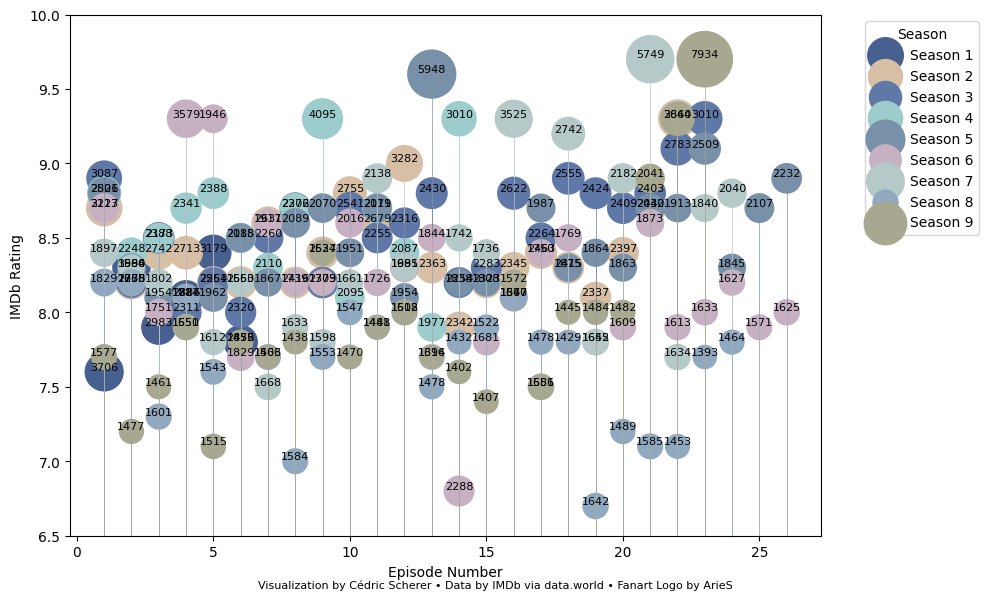

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Load data
df_office = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-17/office_ratings.csv')

# Define color palette
colors = ["#486090", "#D7BFA6", "#6078A8", "#9CCCCC", "#7890A8", "#C7B0C1", "#B5C9C9", "#90A8C0", "#A8A890"]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data points
for season, color in zip(df_office['season'].unique(), colors):
    season_data = df_office[df_office['season'] == season]
    episode_numbers = season_data['episode'].values
    ratings = season_data['imdb_rating'].values
    votes = season_data['total_votes'].values

    # Plot lollipops
    ax.scatter(episode_numbers, ratings, s=votes/5, color=color, label=f"Season {season}")
    for x, y, vote in zip(episode_numbers, ratings, votes):
        ax.plot([x, x], [y, 6.5], color=color, linewidth=0.5)
        ax.text(x, y, f"{vote}", fontsize=8, ha='center', va='bottom', color='black')

# Customize axes
ax.set_xlabel('Episode Number')
ax.set_ylabel('IMDb Rating')
ax.set_ylim(6.5, 10)
ax.yaxis.set_major_locator(MultipleLocator(0.5))

# Add legend
ax.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add caption
caption = "Visualization by Cédric Scherer • Data by IMDb via data.world • Fanart Logo by ArieS"
fig.text(0.5, 0.01, caption, ha='center', fontsize=8)

# # Add logo
# logo = plt.imread("./the-office.png")
# ax.imshow(logo, extent=[-10, -3, -10, -3], aspect='auto')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


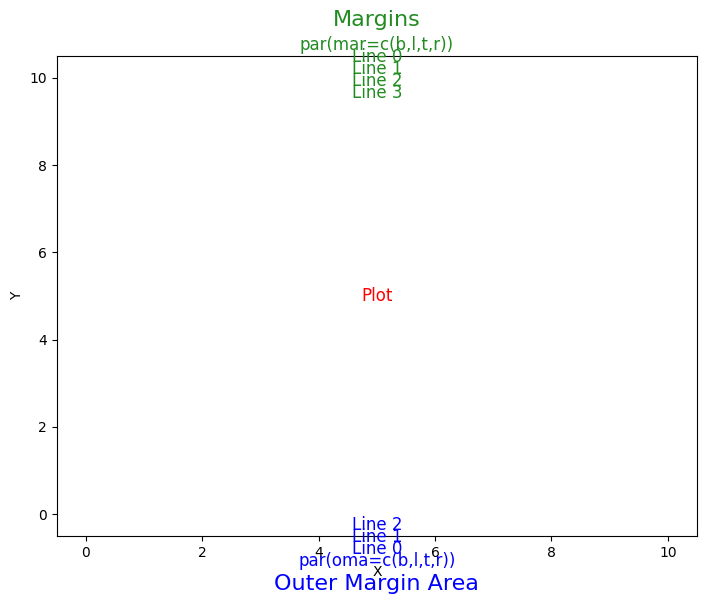

In [ ]:
import matplotlib.pyplot as plt

# Set margins
plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot
plt.plot(range(11), range(11), 'w')  # 'w' makes the line white, essentially hiding it
plt.xlabel("X")
plt.ylabel("Y")

# Place text in the plot
plt.text(5, 5, "Plot", color="red", fontsize=12, ha='center', va='center')

# Place text in the margins
plt.figtext(0.5, 0.95, "Margins", color="forestgreen", fontsize=16, ha='center')
plt.figtext(0.5, 0.91, "par(mar=c(b,l,t,r))", color="forestgreen", fontsize=12, ha='center')
plt.figtext(0.5, 0.89, "Line 0", color="forestgreen", fontsize=12, ha='center')
plt.figtext(0.5, 0.87, "Line 1", color="forestgreen", fontsize=12, ha='center')
plt.figtext(0.5, 0.85, "Line 2", color="forestgreen", fontsize=12, ha='center')
plt.figtext(0.5, 0.83, "Line 3", color="forestgreen", fontsize=12, ha='center')

# Label the outer margin area
plt.figtext(0.5, 0.01, "Outer Margin Area", color="blue", fontsize=16, ha='center')
plt.figtext(0.5, 0.05, "par(oma=c(b,l,t,r))", color="blue", fontsize=12, ha='center')
plt.figtext(0.5, 0.07, "Line 0", color="blue", fontsize=12, ha='center')
plt.figtext(0.5, 0.09, "Line 1", color="blue", fontsize=12, ha='center')
plt.figtext(0.5, 0.11, "Line 2", color="blue", fontsize=12, ha='center')

plt.show()


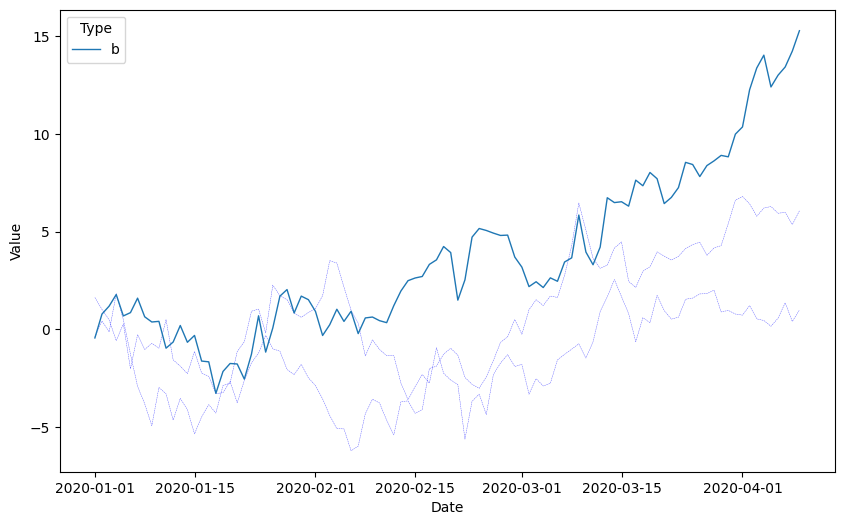

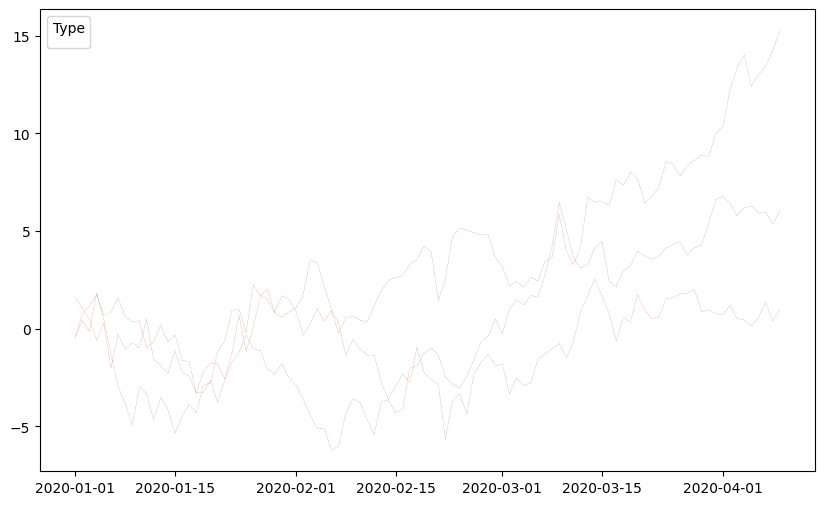

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgba

# Set seed for reproducibility
np.random.seed(1)

# Generate the dataset
period = 100
date_range = pd.date_range(start='2020-01-01', periods=period, freq='D')
values_a = np.cumsum(np.random.normal(size=period))
values_b = np.cumsum(np.random.normal(size=period))
values_c = np.cumsum(np.random.normal(size=period))

df = pd.DataFrame({
    'Date': np.tile(date_range, 3),
    'Value': np.concatenate([values_a, values_b, values_c]),
    'Type': ['a'] * period + ['b'] * period + ['c'] * period
})

# Function to highlight lines based on a condition
def highlight_lines(data, condition, linewidth=1, unhighlighted_linewidth=0.3, unhighlighted_color='blue', unhighlighted_linetype='dashed'):
    highlighted = data.groupby('Type').filter(condition)
    unhighlighted = data.groupby('Type').filter(lambda x: not condition(x))

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot unhighlighted lines
    if unhighlighted is not None and not unhighlighted.empty:
        for key, grp in unhighlighted.groupby('Type'):
            ax.plot(grp['Date'], grp['Value'], color=to_rgba(unhighlighted_color, 0.7), linewidth=unhighlighted_linewidth, linestyle=unhighlighted_linetype, label='_nolegend_')

    # Plot highlighted lines
    if highlighted is not None and not highlighted.empty:
        sns.lineplot(data=highlighted, x='Date', y='Value', hue='Type', linewidth=linewidth, ax=ax)

    plt.legend(title='Type')
    plt.show()

# Plot with highlight condition: max(Value) > 10
highlight_lines(df, lambda x: x['Value'].max() > 10)

# Plot with highlight condition: min(Value) < -10 (you can adjust parameters as needed)
highlight_lines(df, lambda x: x['Value'].min() < -10, unhighlighted_color='darkred', unhighlighted_linetype='dotted')

# Note: For simplicity and readability, we've merged the functionality of all your R plots into a single Python function.
# This function can be adjusted according to specific needs (e.g., changing colors, linetypes, etc.).


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your dataset
file_path = './cv_aw_dot_plot.xlsx'  # Adjust the path if your file is located differently
df = pd.read_excel(file_path)

# Create figure with secondary y-axis for Jacking Speed comparison
fig_jacking_speed = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace for original Jacking Speed
fig_jacking_speed.add_trace(
    go.Scatter(x=df.index, y=df['Jacking_Speed'], mode='lines', name='Original Jacking Speed'),
    secondary_y=False,
)

# Add traces for categorized Jacking Speed
fig_jacking_speed.add_trace(
    go.Scatter(x=df.index, y=df['CV_Jacking_Speed'], mode='lines', name='CV Jacking Speed'),
    secondary_y=True,
)
fig_jacking_speed.add_trace(
    go.Scatter(x=df.index, y=df['AW_Jacking_Speed'], mode='lines', name='AW Jacking Speed', opacity=0.5),
    secondary_y=True,
)
fig_jacking_speed.add_trace(
    go.Scatter(x=df.index, y=df['dot_Jacking_Speed'], mode='lines', name='dot Jacking Speed', opacity=0.5),
    secondary_y=True,
)

# Update layout for Jacking Speed plot
fig_jacking_speed.update_layout(
    title='Comparison of Jacking Speeds',
    xaxis_title='Index',
    yaxis_title='Original Jacking Speed',
    yaxis2_title='CV, AW, dot Jacking Speed',
)

# Create figure with secondary y-axis for Lubricant Usage comparison
fig_lubricant = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace for original Lubricant Usage
fig_lubricant.add_trace(
    go.Scatter(x=df.index, y=df['Lubricant'], mode='lines', name='Original Lubricant Usage'),
    secondary_y=False,
)

# Add traces for categorized Lubricant Usage
fig_lubricant.add_trace(
    go.Scatter(x=df.index, y=df['CV_Lubricant'], mode='lines', name='CV Lubricant Usage'),
    secondary_y=True,
)
fig_lubricant.add_trace(
    go.Scatter(x=df.index, y=df['AW_Lubricant'], mode='lines', name='AW Lubricant Usage', opacity=0.5),
    secondary_y=True,
)
fig_lubricant.add_trace(
    go.Scatter(x=df.index, y=df['dot_Lubricant'], mode='lines', name='dot Lubricant Usage', opacity=0.5),
    secondary_y=True,
)

# Update layout for Lubricant Usage plot
fig_lubricant.update_layout(
    title='Comparison of Lubricant Usage',
    xaxis_title='Index',
    yaxis_title='Original Lubricant Usage',
    yaxis2_title='CV, AW, dot Lubricant Usage',
)

# Show plots
fig_jacking_speed.show()
fig_lubricant.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
file_path = './cv_aw_dot_plot.xlsx'  # Adjust the path as necessary
df = pd.read_excel(file_path)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add original Jacking Speed on the primary y-axis
fig.add_trace(
    go.Scatter(x=df.index, y=df['Jacking_Speed'], name='Original Jacking Speed', mode='lines', line=dict(color='black', width=2)),
    secondary_y=False,
)

# Add categorized Jacking Speed on the secondary y-axis
fig.add_trace(
    go.Scatter(x=df.index, y=df['CV_Jacking_Speed'], name='CV Jacking Speed', mode='lines', line=dict(color='red', width=1, dash='dot'), opacity=0.5),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(x=df.index, y=df['AW_Jacking_Speed'], name='AW Jacking Speed', mode='lines', line=dict(color='blue', width=1, dash='dot'), opacity=.5),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(x=df.index, y=df['dot_Jacking_Speed'], name='dot Jacking Speed', mode='lines', line=dict(color='green', width=2, dash='solid'), opacity=1),
    secondary_y=True,
)

# Update layout to add titles, labels, and range slider for zooming
fig.update_layout(
    title='Comparison of Jacking Speeds',
    xaxis=dict(
        title='Index',
        rangeslider=dict(visible=True),
        type='linear'  # Change to 'date' if your index is datetime
    ),
    yaxis_title='Original Jacking Speed',
    yaxis2_title='CV, AW, dot Jacking Speed',
)

# Show plot
fig.show()


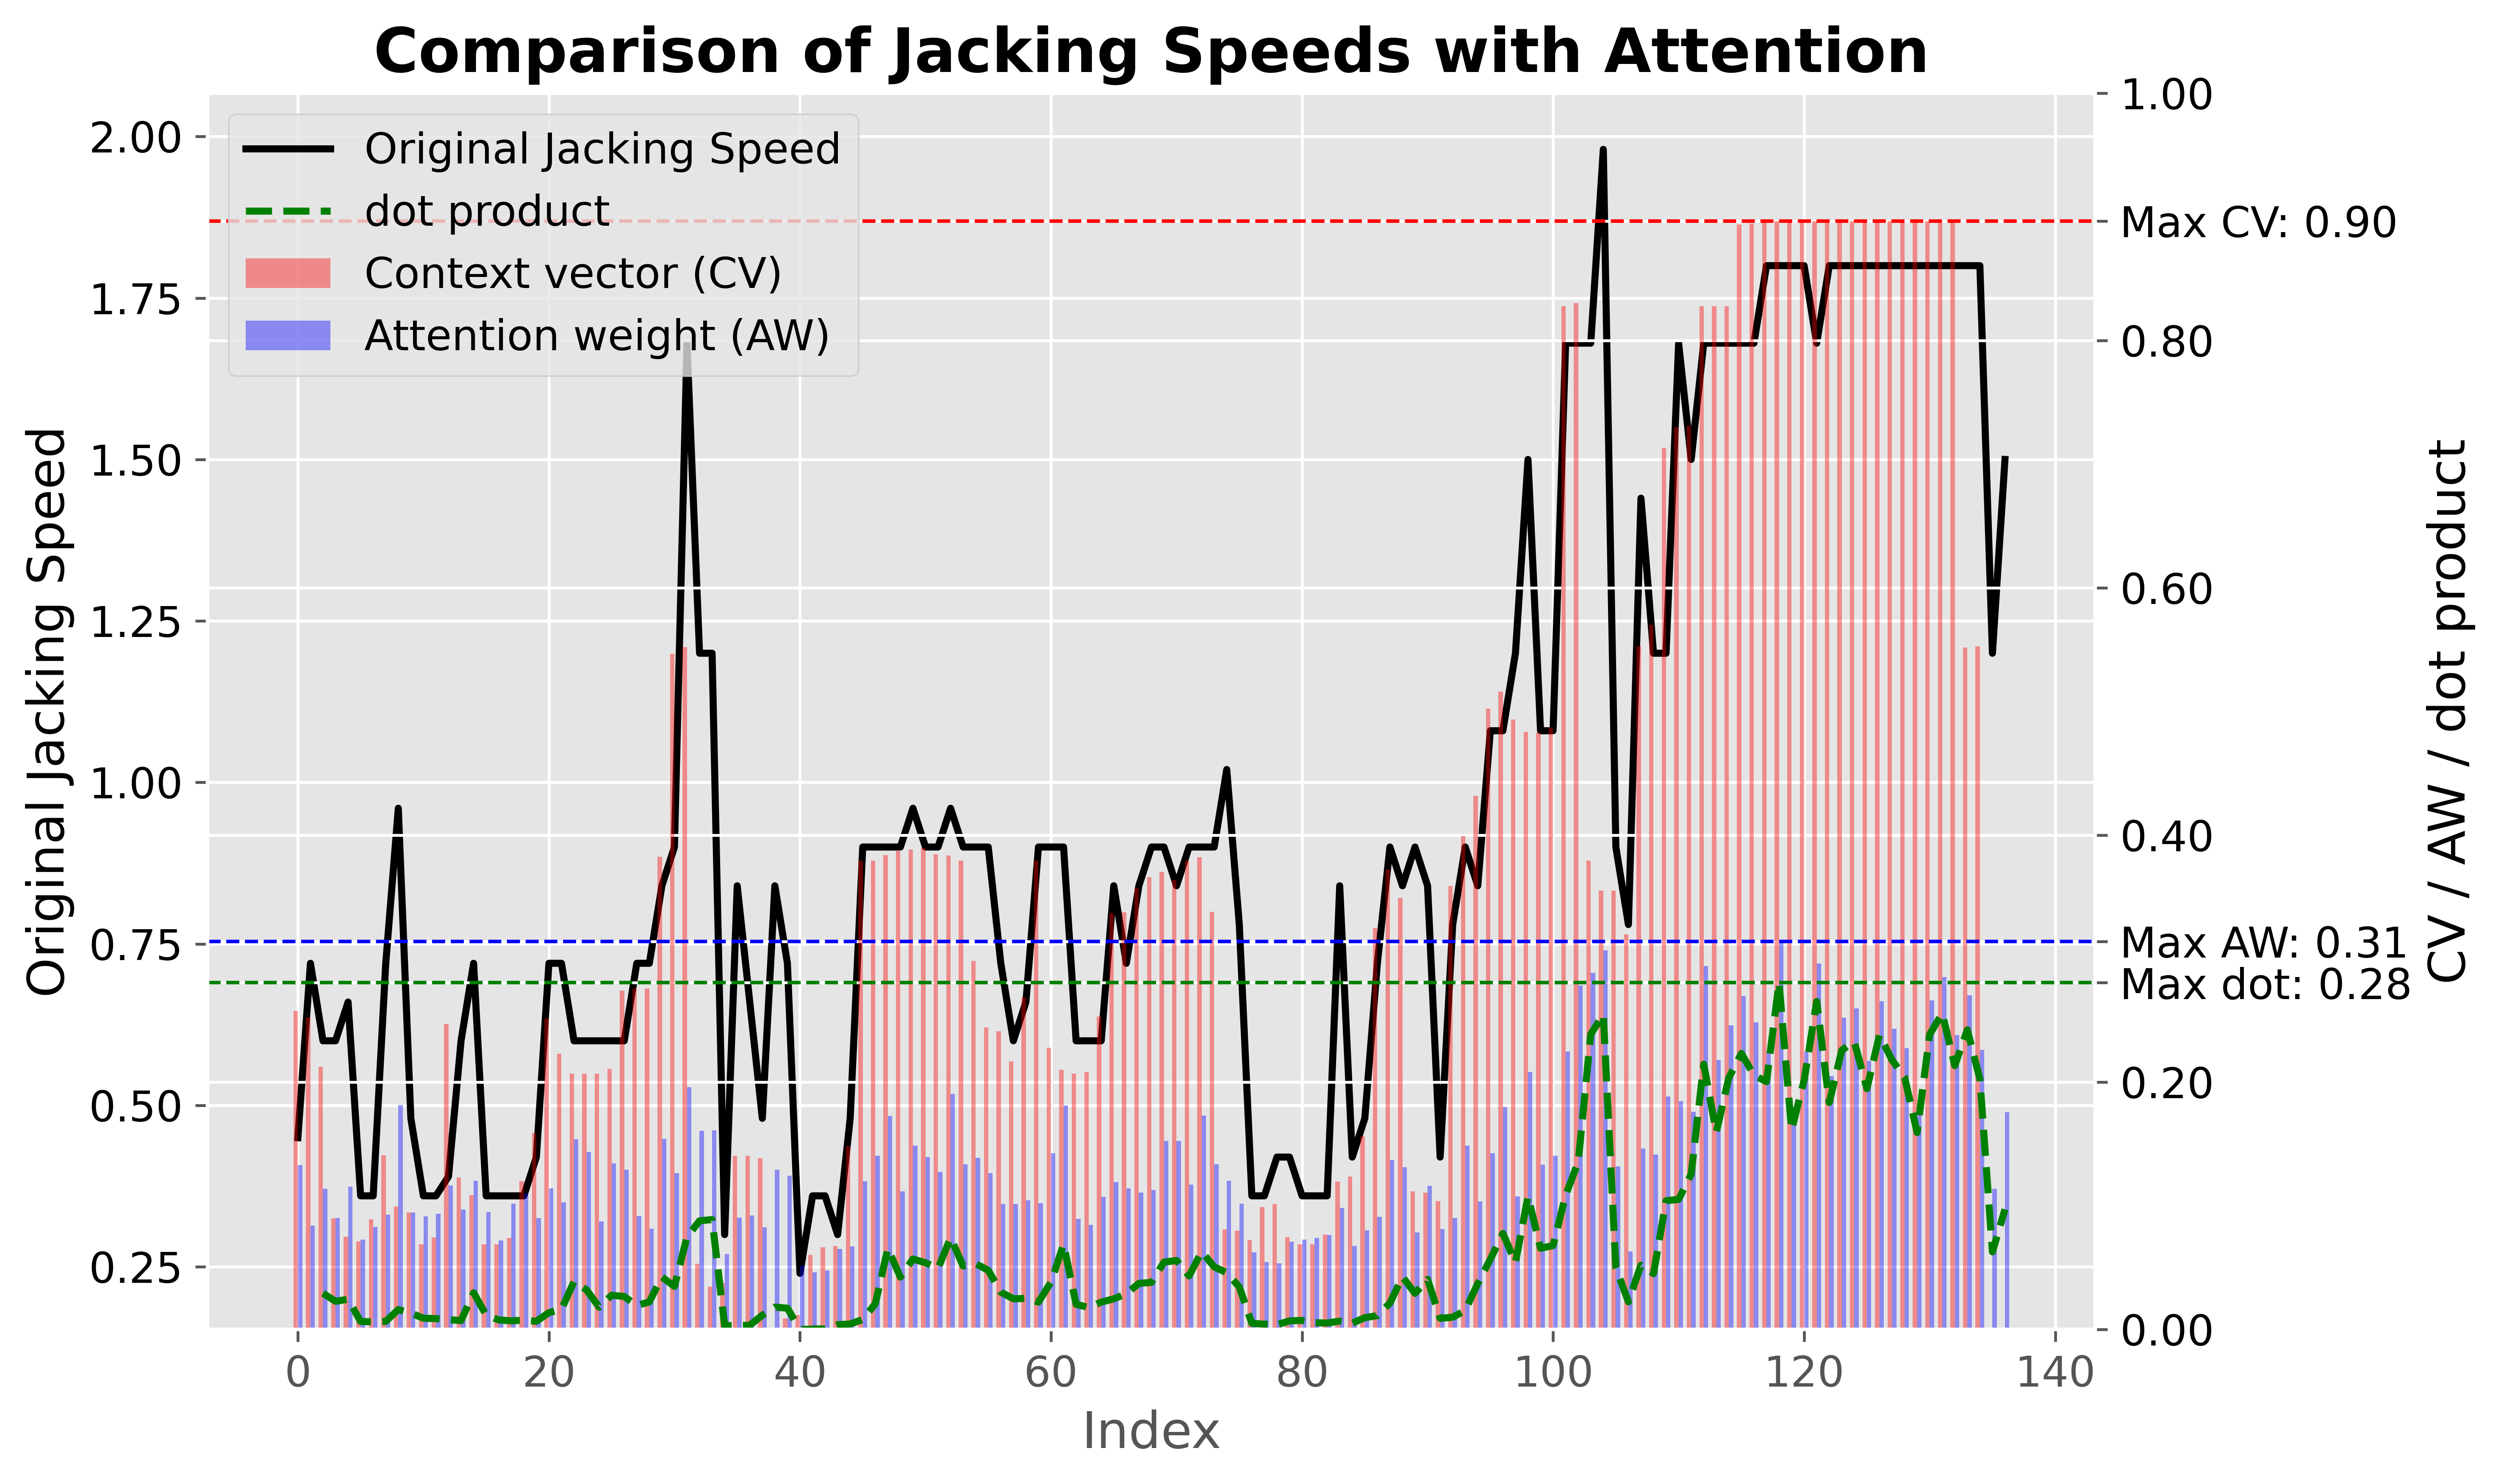

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = './cv_aw_dot_plot.xlsx'  # Make sure the path is correct for your setup
df = pd.read_excel(file_path)

# Set a style
plt.style.use('ggplot')  # Try 'ggplot', 'seaborn-poster', 'seaborn-darkgrid' for different styles

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Create a figure and a set of subplots with increased DPI
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=600)

# Plot original Jacking Speed on the primary y-axis using a line
ax1.plot(df.index, df['Jacking_Speed'], label='Original Jacking Speed', color='black', linewidth=2)
ax1.set_xlabel('Index')
ax1.set_ylabel('Original Jacking Speed', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Calculate maximum values for CV, AW, and dot
max_cv = df['CV_Jacking_Speed'].max()
max_aw = df['AW_Jacking_Speed'].max()
max_dot = df['dot_Jacking_Speed'].max()

# Create a secondary y-axis for the bar charts
ax2 = ax1.twinx()

# Plot CV and AW Jacking Speed as bars with lighter opacity
width = 0.35  # Adjust the bar width
indices = np.arange(len(df.index))  # The x locations for the groups
ax2.bar(indices - width/2, df['CV_Jacking_Speed'], width, label='Context vector (CV)', color='red', alpha=0.4)  # Lighter opacity
ax2.bar(indices + width/2, df['AW_Jacking_Speed'], width, label='Attention weight (AW)', color='blue', alpha=0.4)  # Lighter opacity

# Plot dot Jacking Speed as a line on the secondary y-axis
ax2.plot(df.index, df['dot_Jacking_Speed'], label='dot product', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('CV / AW / dot product', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Determine the range of the secondary y-axis
ymin, ymax = ax2.get_ylim()

# Extend the upper limit to include the max values if they are outside the current range
ymax_extended = max(ymax, max_cv, max_aw, max_dot) * 1.05  # Extend the range by 5% for clarity
ax2.set_ylim(ymin, ymax_extended)

# Adding custom y-tick labels to include the max values
yticks = list(ax2.get_yticks())
ytick_labels = [f"{y:.2f}" for y in yticks]

# Add max value ticks and labels if they are within the range
for value, label in zip([max_cv, max_aw, max_dot], ['Max CV', 'Max AW', 'Max dot']):
    if ymin <= value <= ymax_extended:
        yticks.append(value)
        ytick_labels.append(f"{label}: {value:.2f}")

ax2.set_yticks(yticks)
ax2.set_yticklabels(ytick_labels)

# Draw horizontal lines for the maximum values of CV, AW, and dot
ax2.axhline(max_cv, color='red', linestyle='--', linewidth=1)
ax2.axhline(max_aw, color='blue', linestyle='--', linewidth=1)
ax2.axhline(max_dot, color='green', linestyle='--', linewidth=1)

# Combining legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Comparison of Jacking Speeds with Attention', fontweight='bold')
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


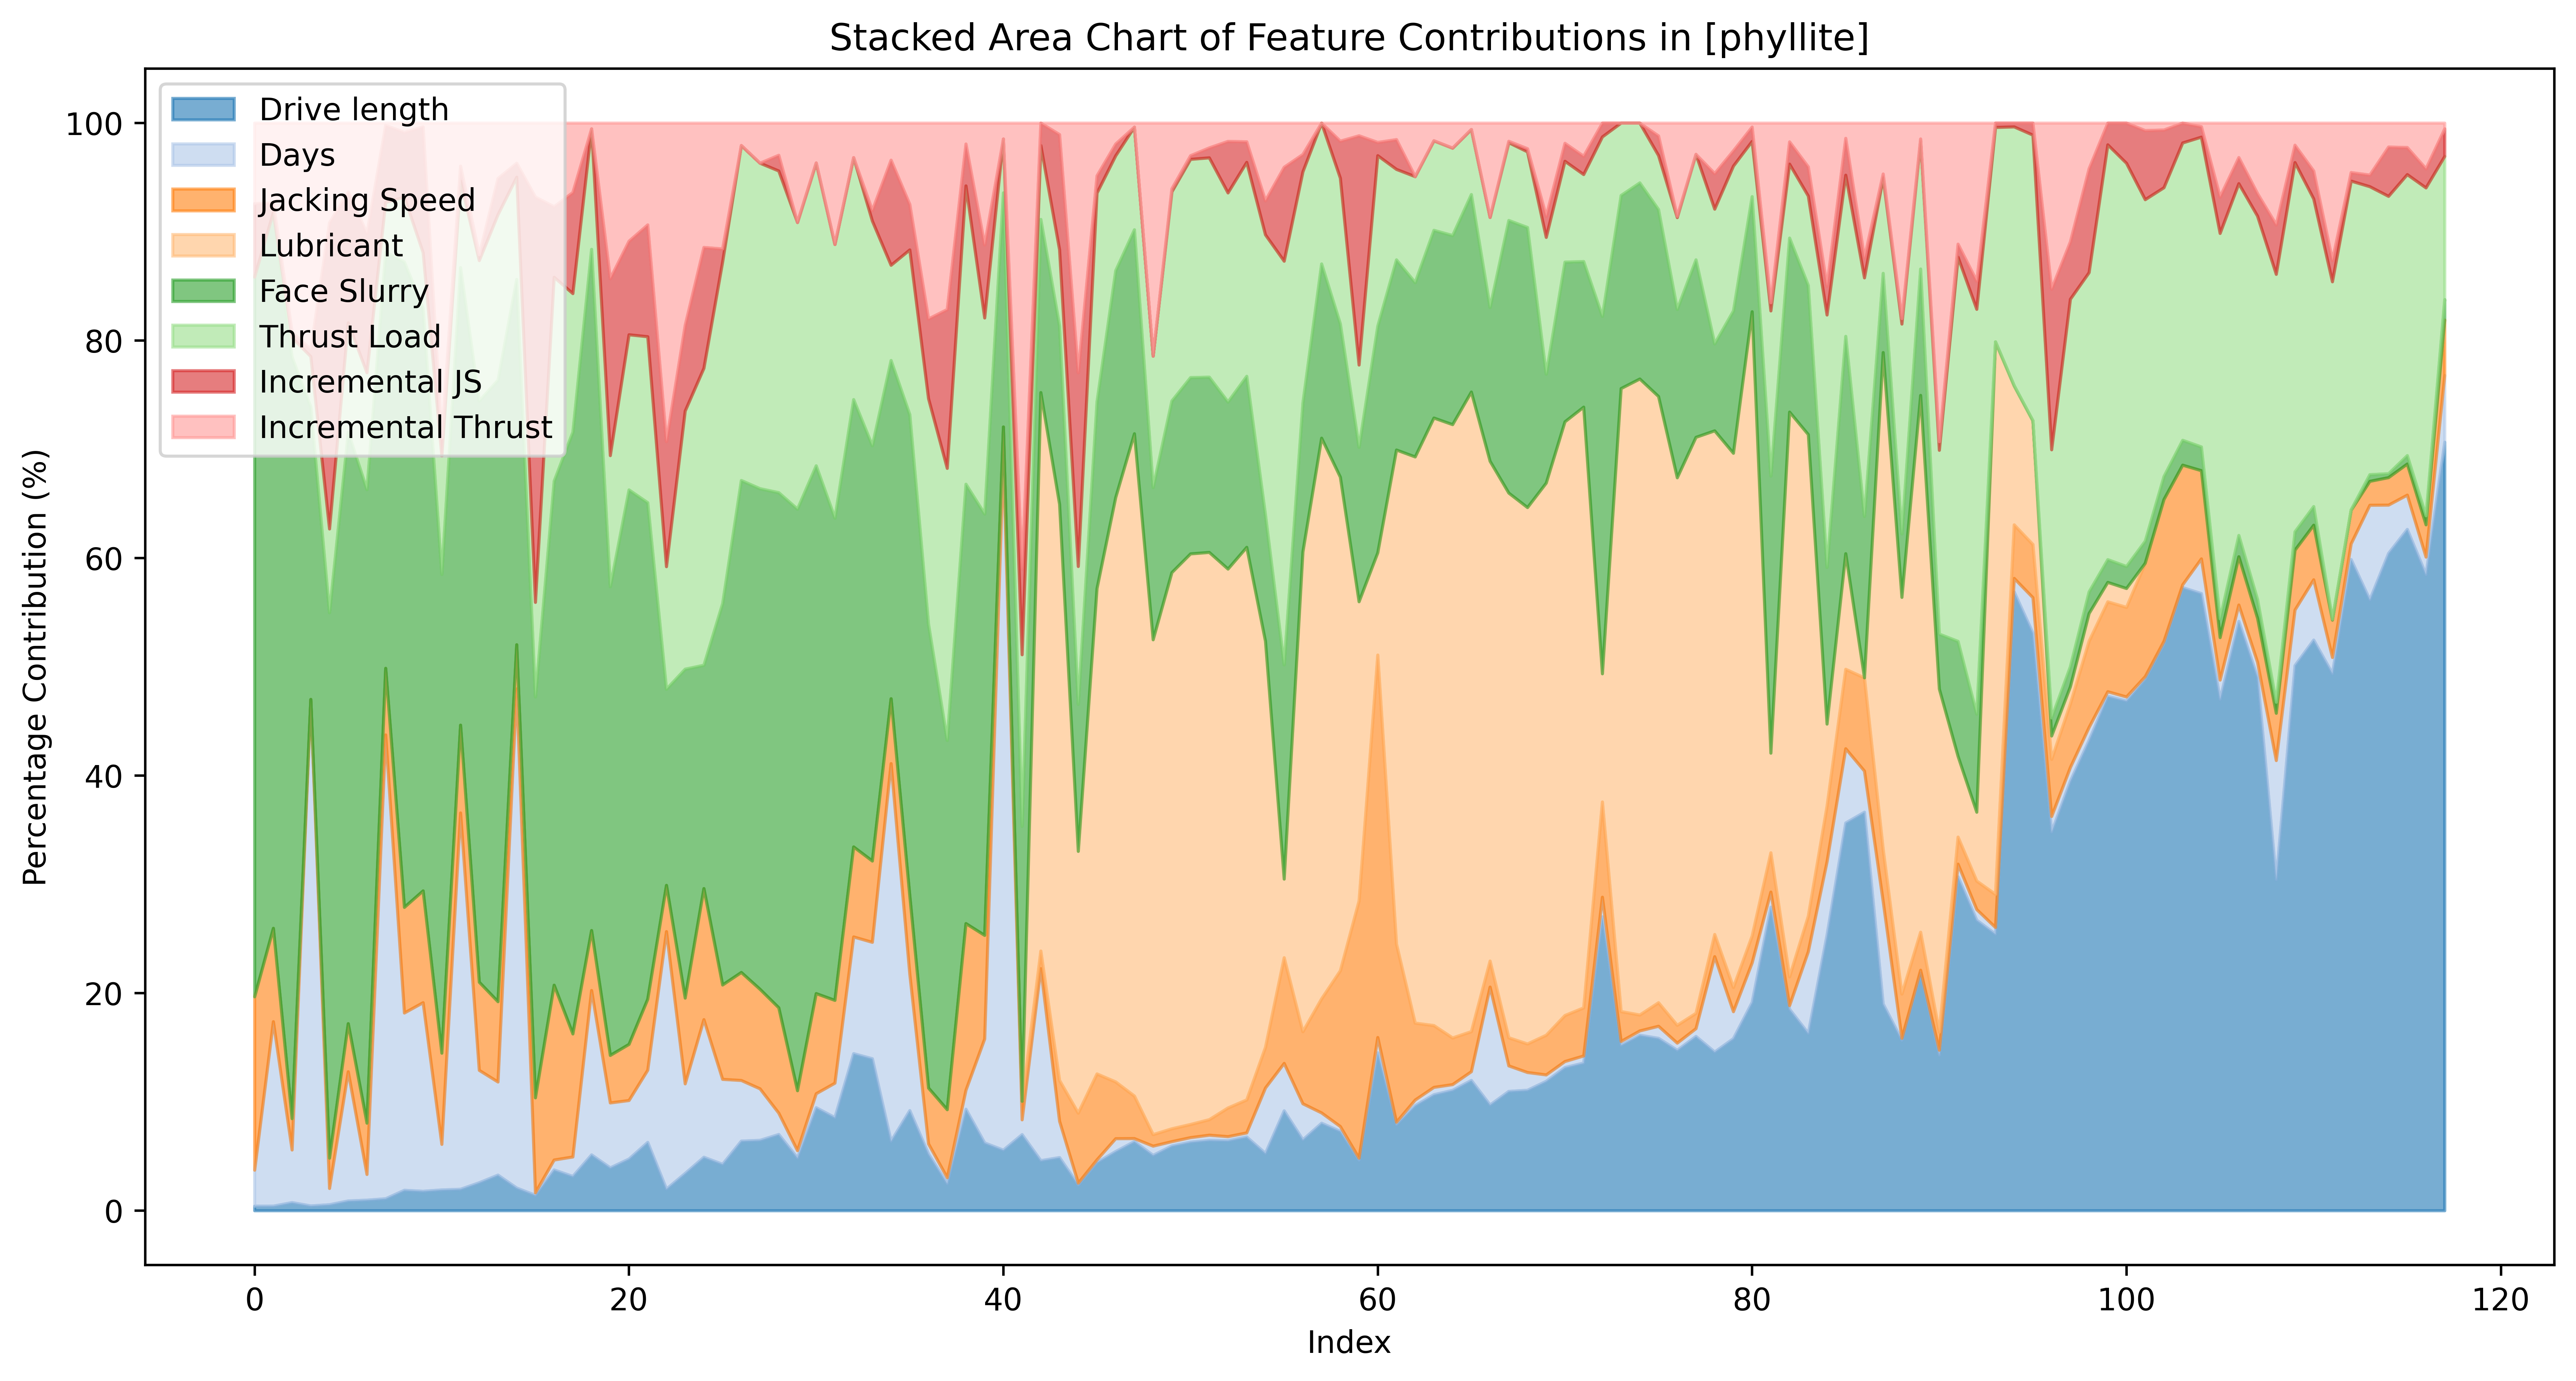

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'phyllite_dot.xlsx'  # Update this with your actual file path
data = pd.read_excel(file_path)

soil_type = 'phyllite'

# Ensure all values are non-negative
data = data.clip(lower=0)

# Calculate the percentage of each feature for every row
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Plotting the stacked area chart with distinct colors for each feature
plt.figure(figsize=(14, 7), dpi=600)
columns_to_plot = data_percentage.columns
colors = plt.cm.tab20(range(len(columns_to_plot)))  # Using a colormap for distinct colors

# Plot each feature with a loop to specify colors
for i, column in enumerate(columns_to_plot):
    if i == 0:
        # For the first feature, we plot normally
        plt.fill_between(data_percentage.index, data_percentage[column], color=colors[i], alpha=0.6, label=column)
    else:
        # For subsequent features, we add on top of the previous ones
        plt.fill_between(data_percentage.index, data_percentage[columns_to_plot[:i+1]].sum(axis=1), data_percentage[columns_to_plot[:i]].sum(axis=1), color=colors[i], alpha=0.6, label=column)

plt.xlabel('Index')
plt.ylabel('Percentage Contribution (%)')
plt.title(f'Stacked Area Chart of Feature Contributions in [{soil_type}]')
plt.legend(loc='upper left')
plt.show()


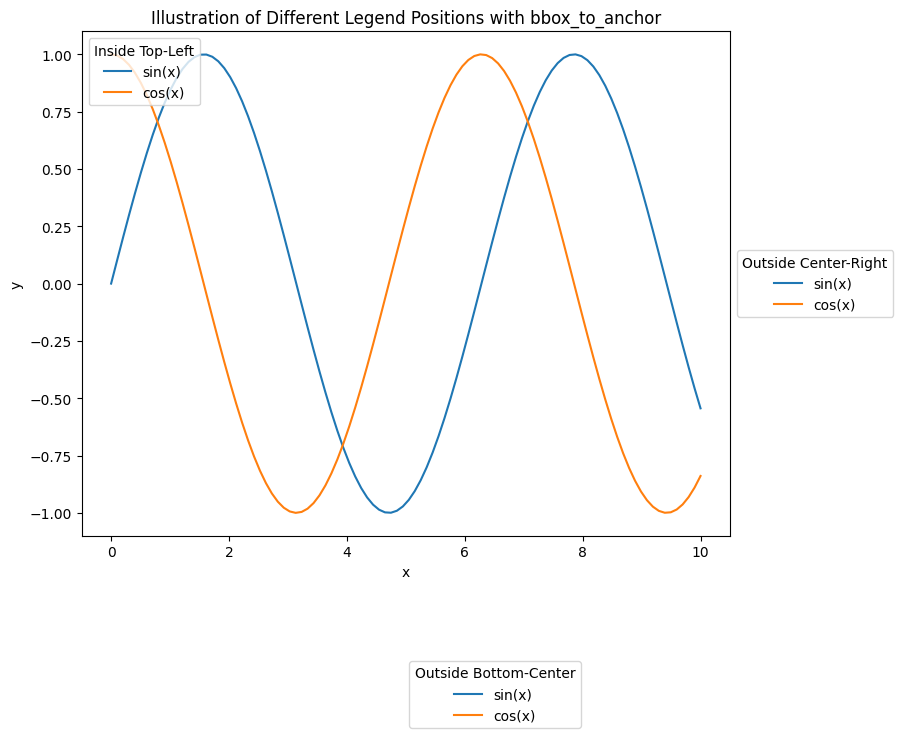

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for plotting
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sample data
sin_line, = ax.plot(x, y1, label='sin(x)')
cos_line, = ax.plot(x, y2, label='cos(x)')

# Customize the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Illustration of Different Legend Positions with bbox_to_anchor')

# Define legend labels and lines
lines = [sin_line, cos_line]
labels = [line.get_label() for line in lines]

# Top-right (outside the axes)
ax.legend(lines, labels, loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, title='Outside Top-Right')

# Center-right (outside the axes)
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(1, 0.5), bbox_transform=ax.transAxes, title='Outside Center-Right')

# Bottom-center (below the axes)
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), bbox_transform=fig.transFigure, title='Outside Bottom-Center')

# Bottom-right (inside the axes)
ax.legend(lines, labels, loc='lower right', title='Inside Bottom-Right')

# Top-left (inside the axes)
ax.legend(lines, labels, loc='upper left', title='Inside Top-Left')

# Adjust layout to make space for the legends
fig.tight_layout(rect=[0, 0, 0.75, 1])

# Show the plot
plt.show()


Epoch 0, Loss: 1.0141339302062988
Epoch 10, Loss: 0.048156898468732834
Epoch 20, Loss: 0.030206261202692986
Epoch 30, Loss: 0.01733669638633728
Epoch 40, Loss: 0.010194015689194202
Epoch 50, Loss: 0.010184548795223236
Epoch 60, Loss: 0.009799463674426079
Epoch 70, Loss: 0.00918384175747633
Epoch 80, Loss: 0.009947792626917362
Epoch 90, Loss: 0.008198319002985954
Generated Data:
[[-9.87718776e-02  2.47920227e+00  4.53041260e+02  4.86095200e+01]
 [ 3.57497305e-01  1.64227998e+00  4.02010071e+02  2.84343910e+01]
 [ 4.64064658e-01  2.75057888e+00  4.24631531e+02  7.15644608e+01]
 [ 4.96530905e-02  2.42994595e+00  3.89435394e+02  4.23190536e+01]
 [ 8.92192945e-02  3.15680432e+00  3.24276703e+02  2.95274887e+01]
 [-7.76023343e-02  2.39186692e+00  3.66666443e+02  4.83540039e+01]
 [ 4.01399910e-01  1.87625611e+00  3.86325287e+02  4.25685005e+01]
 [ 1.54607490e-01  3.03639507e+00  4.59182220e+02  5.63251534e+01]
 [ 1.78992357e-02  2.20161271e+00  5.45265381e+02  6.39596710e+01]
 [ 8.51271078e-0

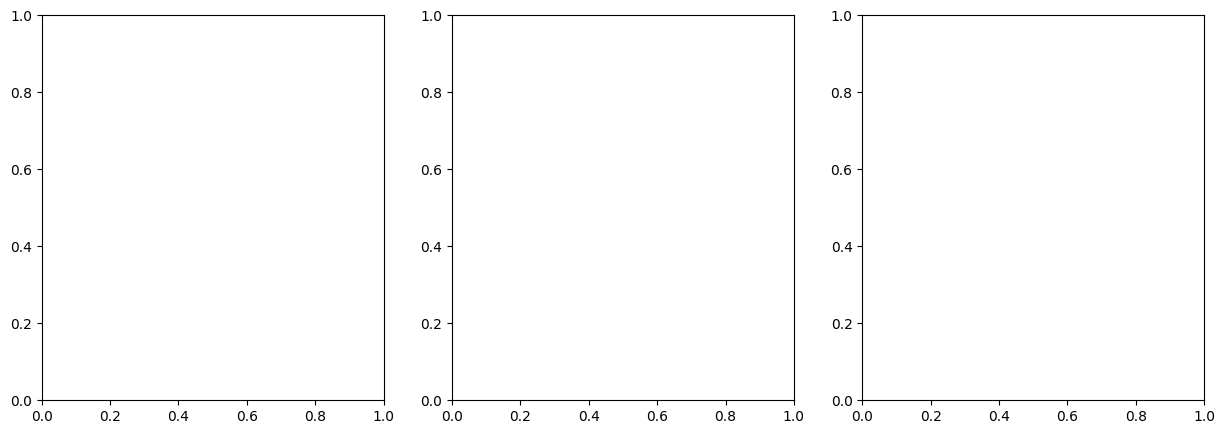

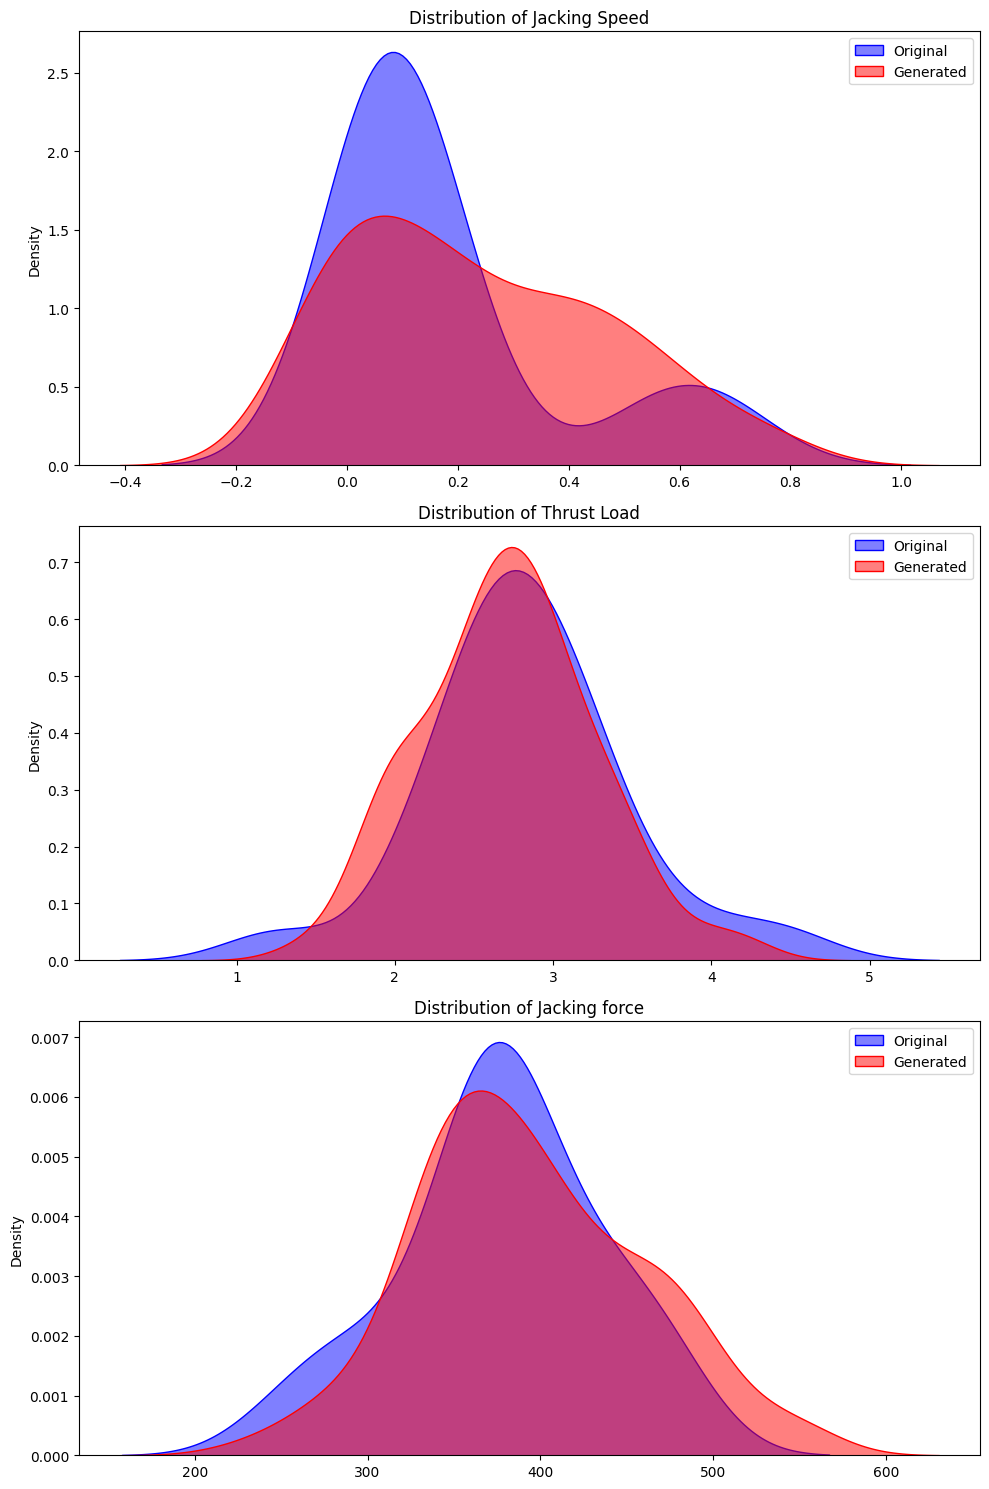

Original Data Stats:
               Days  Jacking Speed  Thrust Load  Jacking force
count  2.400000e+01       24.00000    24.000000      24.000000
mean   1.769387e-01        2.82250   377.083344      37.083332
std    2.102326e-01        0.62816    58.008930      17.687914
min   -8.423061e-09        1.26000   250.000000       0.000000
25%    4.756944e-02        2.58000   350.000000      30.000000
50%    1.027778e-01        2.73000   375.000000      45.000000
75%    1.678819e-01        3.18000   406.250000      45.000000
max    6.819444e-01        4.44000   475.000000      75.000000
Generated Data Stats:
            Days  Jacking Speed  Thrust Load  Jacking force
count  96.000000      96.000000    96.000000      96.000000
mean    0.236882       2.710225   393.547516      41.464970
std     0.234255       0.543628    65.173851      17.121042
min    -0.127442       1.431237   235.059647       0.065426
25%     0.046472       2.392380   345.832352      29.453509
50%     0.190571       2.71906

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data_path = './PJRecord_Phyllite_input.csv'
data = pd.read_csv(data_path)

# Select relevant features
features = data[['Days', 'Jacking Speed', 'Thrust Load', 'Jacking force']]

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
normalized_features = torch.tensor(normalized_features, dtype=torch.float32)

# Split the data into train and test
train_data, test_data = train_test_split(normalized_features, test_size=0.2, random_state=42)

# Define the diffusion model
class DiffusionModel(nn.Module):
    def __init__(self):
        super(DiffusionModel, self).__init__()
        self.fc1 = nn.Linear(4, 128)  # Adjust size according to the number of features
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 4)  # Output size matches the number of features

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model and optimizer
model = DiffusionModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_function = nn.MSELoss()

# Training parameters
epochs = 100
noise_level = 0.1

# Function to add noise
def add_noise(data, noise_level):
    return data + torch.randn_like(data) * noise_level

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    noisy_data = add_noise(train_data, noise_level)
    predictions = model(noisy_data)
    loss = loss_function(predictions, train_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Generating new data
model.eval()
with torch.no_grad():
    noise_data = torch.randn(train_data.shape)
    generated_data = model(noise_data)
    generated_data = scaler.inverse_transform(generated_data.numpy())

print('Generated Data:')
print(generated_data)

# Comparing original and generated data
original_data = scaler.inverse_transform(test_data.numpy())
comparison_fig, axs = plt.subplots(1, 3, figsize=(15, 5))

def compare_distributions(original, generated, features):
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))
    for i, feat in enumerate(features):
        sns.kdeplot(original[:, i], ax=axes[i], fill=True, label='Original', color='blue', alpha=0.5)
        sns.kdeplot(generated[:, i], ax=axes[i], fill=True, label='Generated', color='red', alpha=0.5)
        axes[i].set_title(f'Distribution of {feat}')
        axes[i].legend()
    plt.tight_layout()
    plt.show()

# Assuming original_data and generated_data are numpy arrays loaded with your data
features = ['Jacking Speed', 'Thrust Load', 'Jacking force']
compare_distributions(original_data, generated_data, features)

# Statistical comparison
print("Original Data Stats:")
print(pd.DataFrame(original_data, columns=['Days', 'Jacking Speed', 'Thrust Load', 'Jacking force']).describe())
print("Generated Data Stats:")
print(pd.DataFrame(generated_data, columns=['Days', 'Jacking Speed', 'Thrust Load', 'Jacking force']).describe())

以下是一些常见的 matplotlib 中的 colormap，你可以根据你的需求选择：

1. viridis: 从紫色到黄色的平滑过渡，适用于渐变数据。
2. plasma: 从紫色到橙色的平滑过渡，适用于渐变数据。
3. inferno: 从黑色到橙色的平滑过渡，适用于渐变数据。
4. magma: 从黑色到橙色再到白色的平滑过渡，适用于渐变数据。
5. cividis: 从蓝色到黄色的平滑过渡，适用于渐变数据，同时对色盲友好。

In [ ]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.2 MB/s eta 0:00:00


Total number train_set: 1200


<Figure size 3600x1200 with 0 Axes>

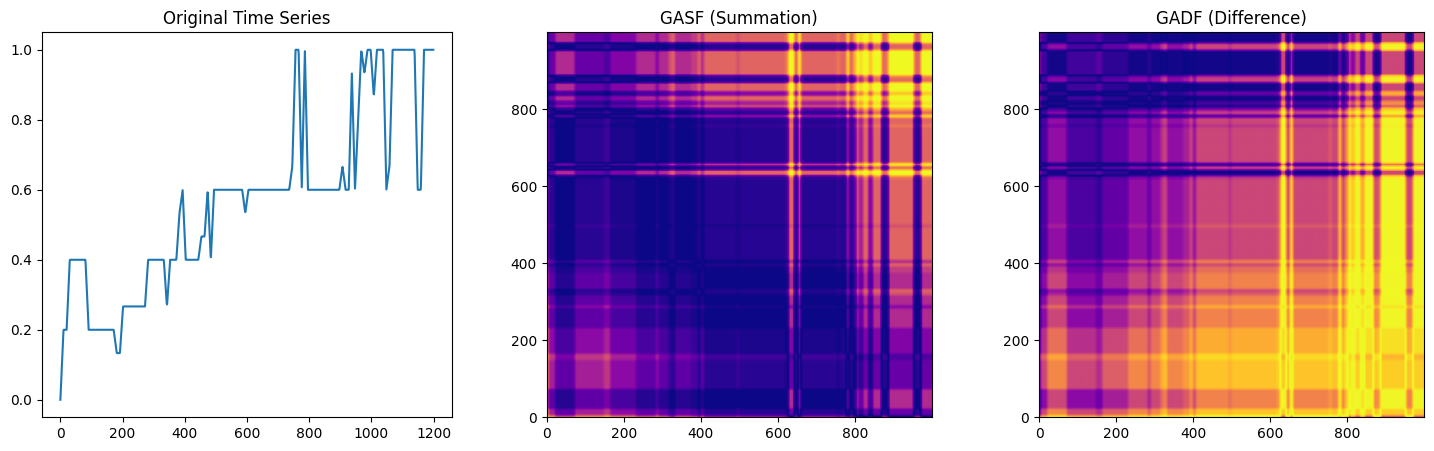

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler

# Make sure first colume in the csv is Drive length (m)
df = pd.read_csv('expanded_entire_dataset.csv')

# Clean data by replacing non-numeric values with NaN
df = df.apply(pd.to_numeric, errors='coerce')
# Fill NaN values with appropriate strategies (e.g., mean, median, or 0)
df = df[:].fillna(0)

X_ori = df.drop('Jacking force', axis=1).values
y_ori = df['Jacking force'].values.reshape(-1, 1)

scalers = {}  # Dictionary to store the scaler used for each column
for column in df.columns:
    data = df[column].values.reshape(-1, 1)

    # Determine the scaling range based on the presence of negative values
    if (data <= 0).all():  # All values are non-positive
        scaler = MinMaxScaler(feature_range=(-1, 1))
    elif (data >= 0).all():  # All values are non-negative
        scaler = MinMaxScaler(feature_range=(0, 1))
    else:  # Mixed positive and negative values
        scaler = MinMaxScaler(feature_range=(-1, 1))

    df[column] = scaler.fit_transform(data).flatten()
    scalers[column] = scaler  # Store the scaler for inverse transformation later


print('Total number train_set:', len(df))

feature_names = list(df.columns)
feature_names.remove('Jacking force')

X = df.drop('Jacking force', axis=1).values
y = df['Jacking force'].values.reshape(-1, 1)

# 生成示例时序数据
# time_series = np.sin(np.linspace(0, 2 * np.pi, 100))
# time_series = X[:, 2]
time_series = y[:]

# 将时序数据标准化到 [0, 1] 范围
# normalized_data = (time_series - np.min(time_series)) / (np.max(time_series) - np.min(time_series))
# normalized_data = X[:, 2]
normalized_data = y[:]


# 将时序数据转换为 Gramian Angular Field 图像
gaf1 = GramianAngularField(image_size=1000, method='summation')
gaf2 = GramianAngularField(image_size=1000, method='difference')  # 设置图像大小为 summation or difference

# 将时序数据转换为 GAF 图像
gaf_image1 = gaf1.fit_transform(normalized_data.reshape(1, -1))
gaf_image2 = gaf2.fit_transform(normalized_data.reshape(1, -1))

# 绘制原始时序数据和 GAF 图像
plt.figure(figsize=(12, 4), dpi=300)

# plt.subplot(1, 2, 1)
# plt.plot(time_series)
# plt.title('Original Time Series')

# plt.subplot(1, 2, 1)
# plt.imshow(gaf_image1[0], cmap='plasma', origin='lower')
# plt.title('Gramian Angular Summation Field (GASF)')

# plt.subplot(1, 2, 2)
# plt.imshow(gaf_image2[0], cmap='plasma', origin='lower')
# plt.title('Gramian Angular Difference Field (GADF)')

# Plotting original time series, GAF summation, and GAF difference side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # Increase the figure size for better visualization

axs[0].plot(time_series)
axs[0].set_title('Original Time Series')

axs[1].imshow(gaf_image1[0], cmap='plasma', origin='lower')
axs[1].set_title('GASF (Summation)')

axs[2].imshow(gaf_image2[0], cmap='plasma', origin='lower')
axs[2].set_title('GADF (Difference)')

plt.show()

In [ ]:
!pip install joypy

In [ ]:
import pandas as pd
import numpy as np; np.random.seed(2)
import random; random.seed(2)
df = pd.DataFrame({'var1': np.random.normal(70, 100, 500),
                   'var2': np.random.normal(250, 100, 500),
                   'group': random.choices(["G1", "G2", "G3", "G4", "G5"], k=500)})
df.head

<bound method NDFrame.head of            var1        var2 group
0     28.324215  274.685751    G5
1     64.373317  103.122420    G5
2   -143.619610  364.709994    G1
3    234.027081  259.555698    G1
4   -109.343559  139.256127    G5
..          ...         ...   ...
495  137.926718  258.193179    G4
496   68.233932  306.872559    G4
497   93.604092  226.551733    G2
498  119.403587  253.511024    G5
499  224.627765  269.678527    G2

[500 rows x 3 columns]>

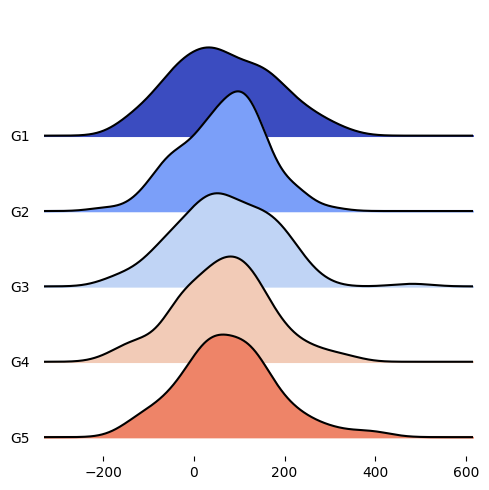

In [ ]:
from matplotlib import cm
import joypy
fig, ax = joypy.joyplot(df, by="group", column="var1", figsize=(5,5),
                        colormap=cm.coolwarm)

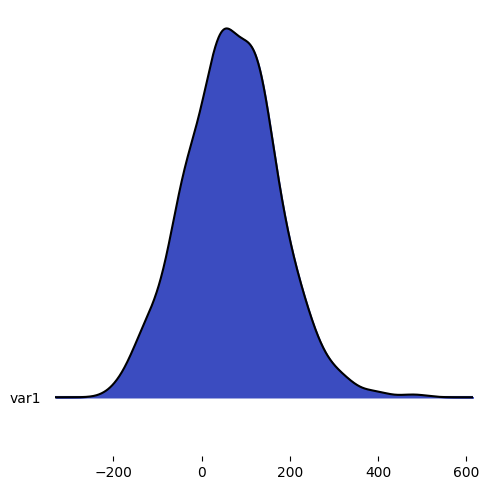

In [ ]:
from matplotlib import cm
import joypy
fig, ax = joypy.joyplot(df, column="var1", figsize=(5,5),
                        colormap=cm.coolwarm)

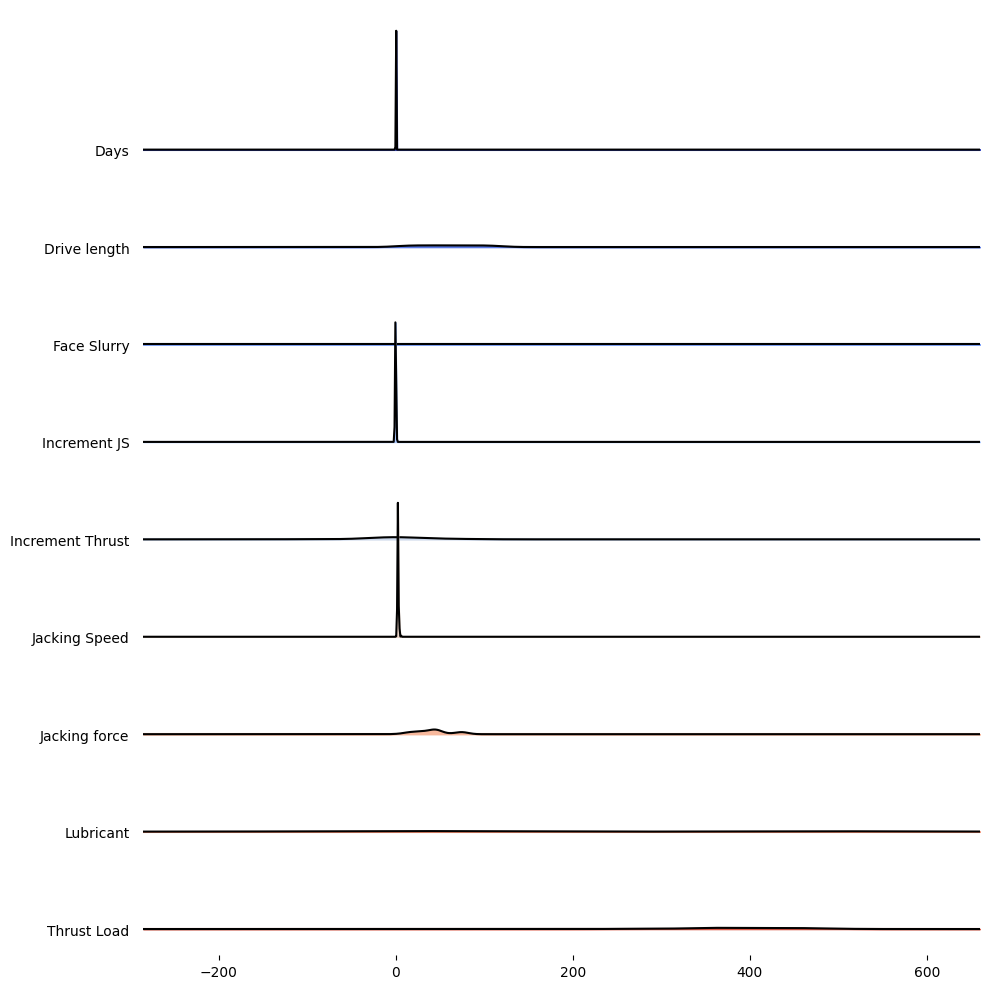

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import joypy

# Load the data from the CSV file
file_path = './PJRecord_Phyllite_input.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(), data.columns
# Melt the dataframe to long format
long_format_df = data.melt(var_name='group', value_name='var1')

# Plot using joypy
fig, ax = joypy.joyplot(long_format_df, by='group', column='var1', figsize=(10, 10), colormap=cm.coolwarm)
plt.show()

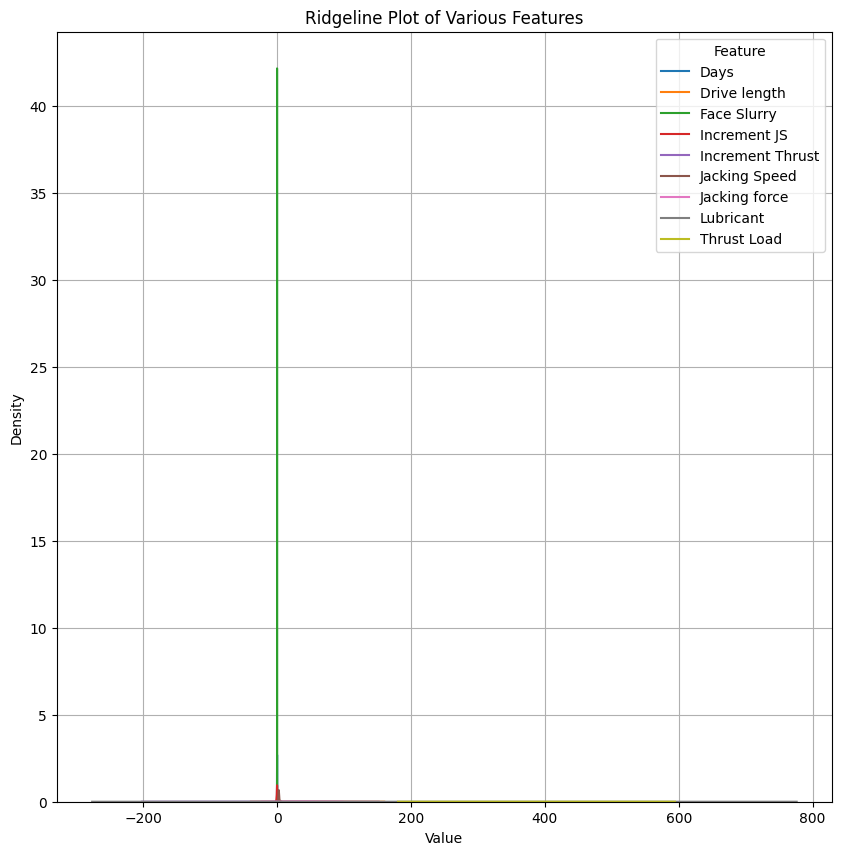

In [ ]:
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(10, 10))

# Iterate over each unique group in the long-format dataframe and create a density plot
for i, (name, group) in enumerate(long_format_df.groupby('group')):
    sns.kdeplot(group['var1'], ax=plt.gca(), label=name)  # Plotting kernel density estimate for each group

plt.legend(title='Feature')
plt.title('Ridgeline Plot of Various Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# Show plot
plt.show()

<ipython-input-11-081239d62ff7>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=group_data, x='var1', fill=True, label=group, bw_adjust=0.5, common_norm=False, color=cm.coolwarm(i / len(data.columns)))
<ipython-input-11-081239d62ff7>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=group_data, x='var1', fill=True, label=group, bw_adjust=0.5, common_norm=False, color=cm.coolwarm(i / len(data.columns)))


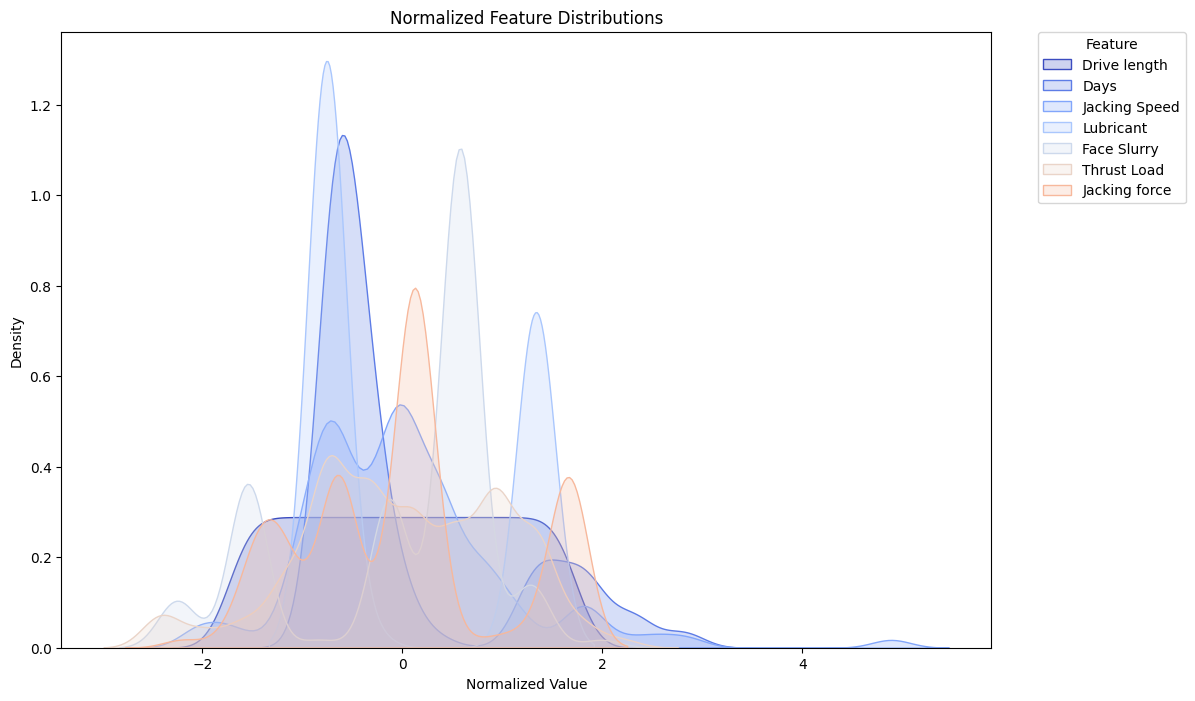

In [ ]:
from scipy.stats import zscore

# Reload the data in case it has changed
file_path = './PJRecord_Phyllite_input.csv'
data = pd.read_csv(file_path)

# Normalize the data using z-score normalization
normalized_data = data.apply(zscore)

# Melt the normalized dataframe to long format
long_format_normalized_df = normalized_data.melt(var_name='group', value_name='var1')

# Since 'joypy' is not available in this environment, we'll use seaborn's 'kdeplot' as an alternative for joyplot
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Using seaborn's kdeplot to simulate joyplot
# Plots will be overlaid with some vertical offset
for i, group in enumerate(long_format_normalized_df['group'].unique()):
    # Filter the data for the current group
    group_data = long_format_normalized_df[long_format_normalized_df['group'] == group]
    # Plot the data with an offset of 'i'
    sns.kdeplot(data=group_data, x='var1', fill=True, label=group, bw_adjust=0.5, common_norm=False, color=cm.coolwarm(i / len(data.columns)))

# Add the legend outside the plot
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Normalized Feature Distributions')
plt.xlabel('Normalized Value')
plt.ylabel('Density')

# Display the plot
plt.show()


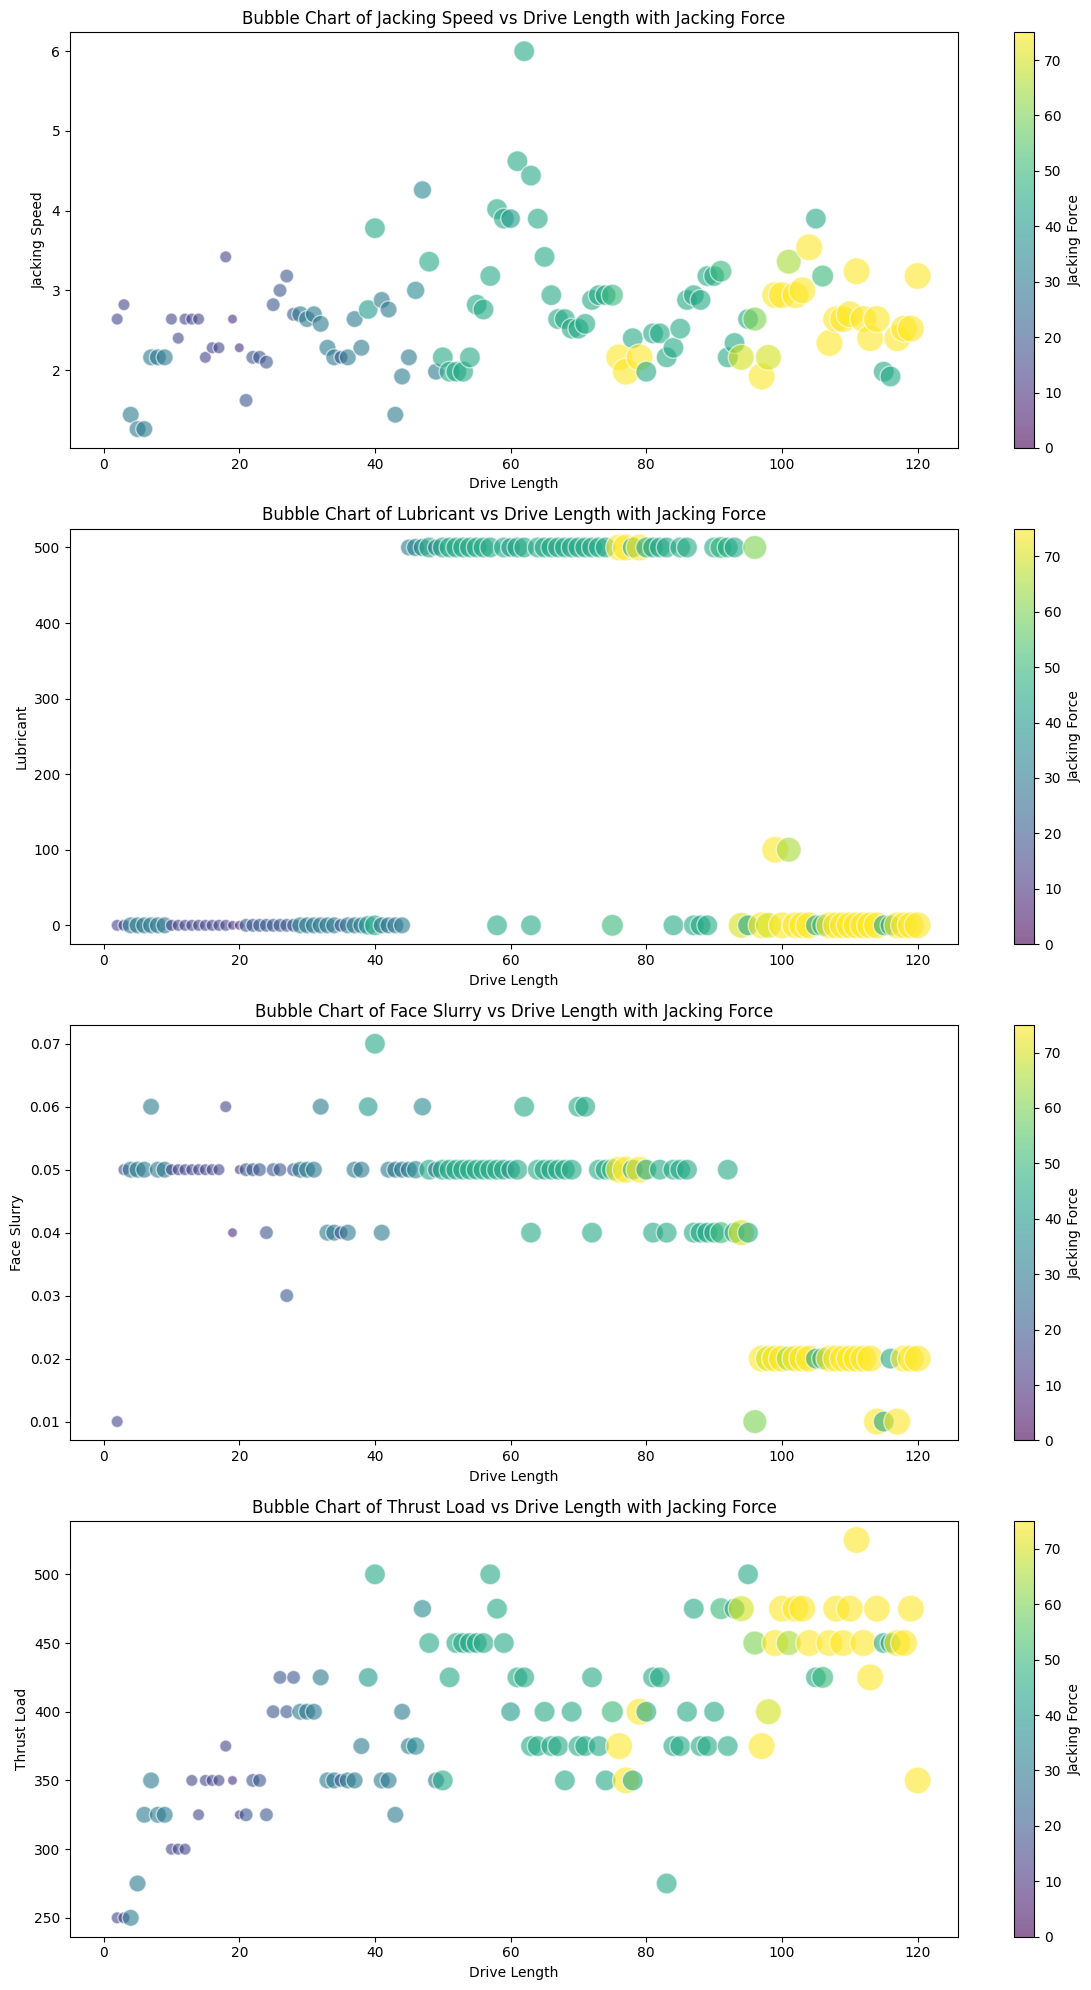

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
data = pd.read_csv('./PJRecord_Phyllite_input.csv')  # Adjust the path to your CSV file

# Feature labels for plotting
labels = ['Jacking Speed', 'Lubricant', 'Face Slurry', 'Thrust Load']

# Setting up the figure for bubble charts
fig, axes = plt.subplots(len(labels), 1, figsize=(12, 20))

# Creating a bubble chart for each feature
for ax, feature in zip(axes, labels):
    # Scale bubble sizes for visibility, proportional to the 'Jacking force'
    bubble_sizes = data['Jacking force'] * 5
    # Scatter plot with scaled bubble sizes and color mapped to 'Jacking force'
    scatter = ax.scatter(data['Drive length'], data[feature], s=bubble_sizes,
                         c=data['Jacking force'], cmap='viridis', alpha=0.6, edgecolors='w', marker='o')
    ax.set_title(f"Bubble Chart of {feature} vs Drive Length with Jacking Force")
    ax.set_xlabel('Drive Length')
    ax.set_ylabel(feature)
    # Adding a colorbar to each subplot to indicate the 'Jacking Force' levels
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Jacking Force')

plt.tight_layout()
plt.show()


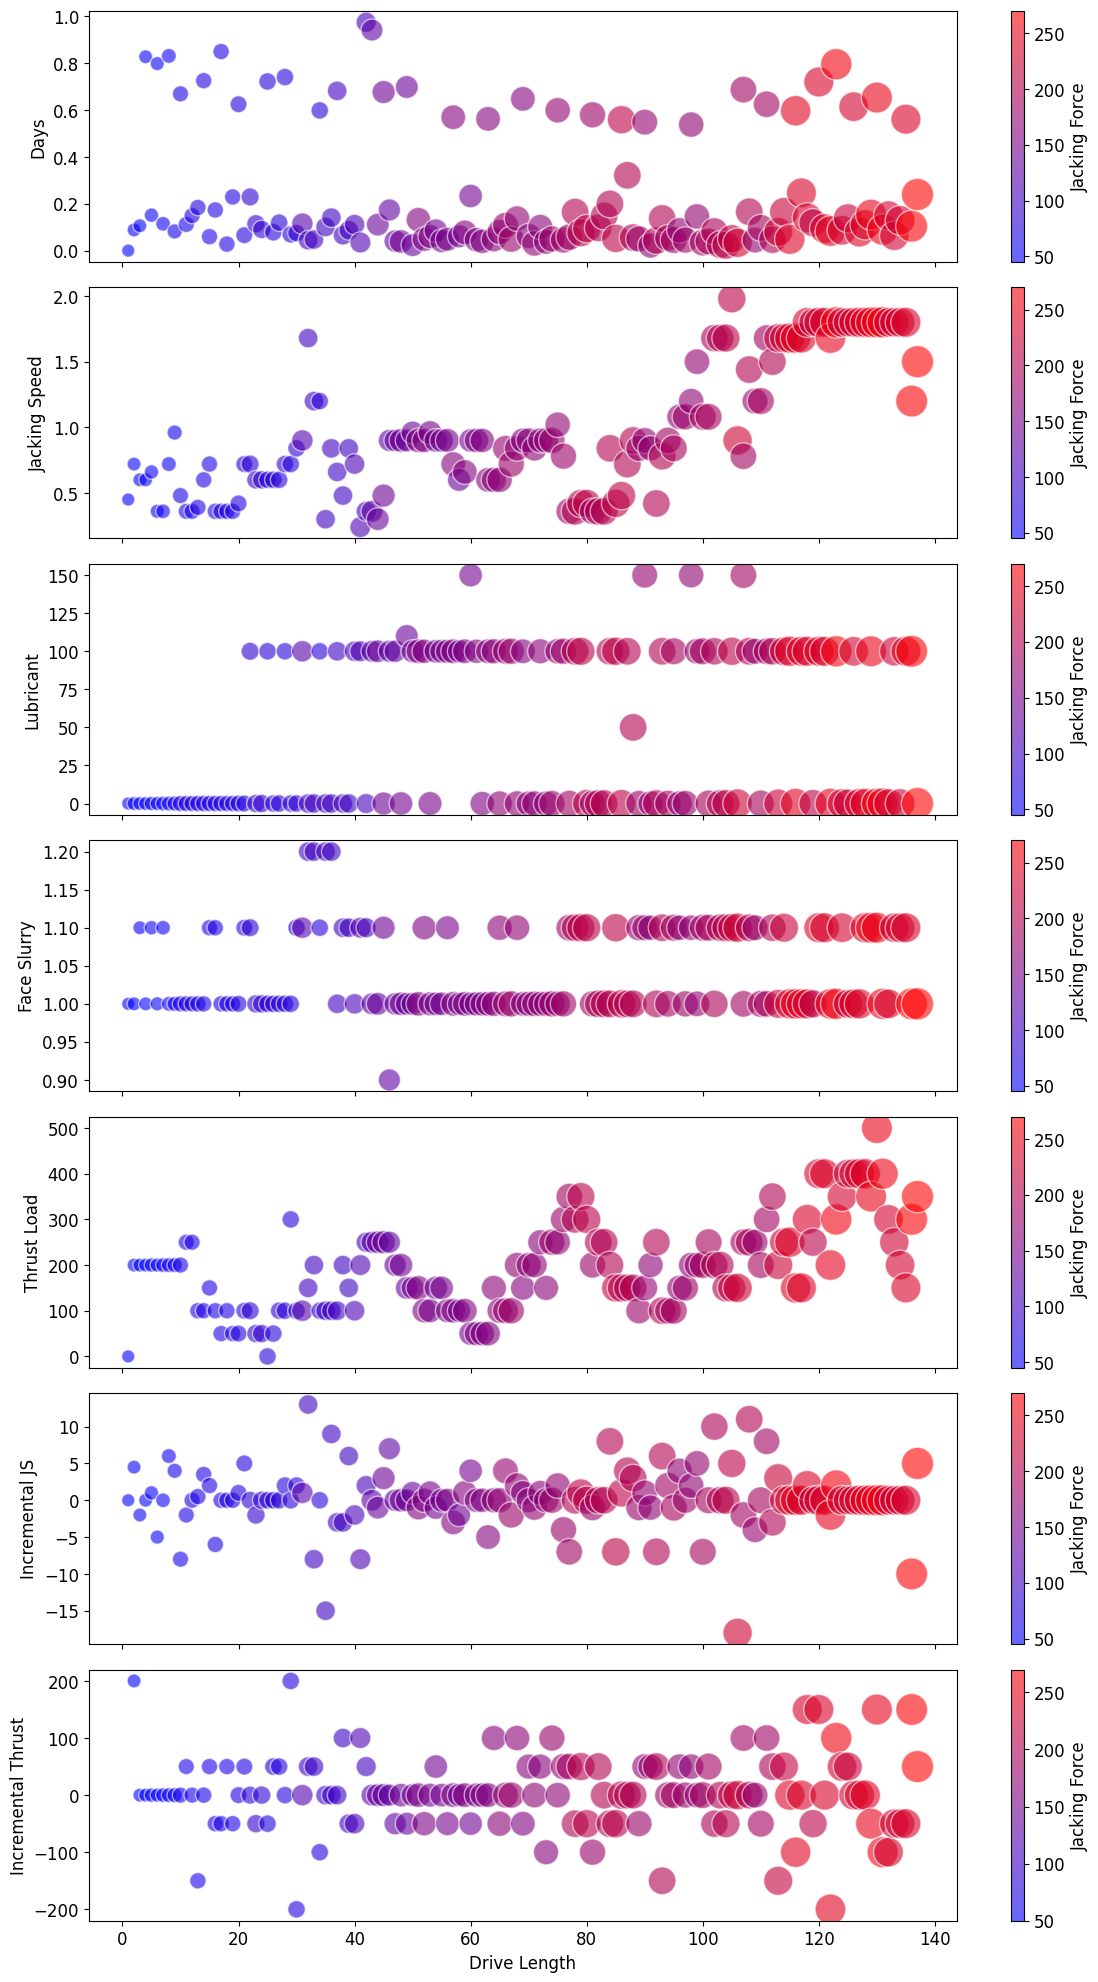

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Load your data
data = pd.read_csv('./PJRecord_Sandstone_input.csv')  # Adjust the path to your CSV file

# Create a custom colormap from blue to red
colors = ["blue", "red"]
cmap = LinearSegmentedColormap.from_list("custom_blue_red", colors, N=256)

# Feature labels for plotting
labels = ['Days','Jacking Speed', 'Lubricant', 'Face Slurry', 'Thrust Load','Incremental JS', 'Incremental Thrust']

# Setting up the figure for bubble charts, with shared x-axis
fig, axes = plt.subplots(len(labels), 1, figsize=(12, 20), sharex=True)
# Set the font to Times New Roman
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Creating a bubble chart for each feature
for ax, feature in zip(axes, labels):
    # Scale bubble sizes for visibility, proportional to the 'Jacking force'
    bubble_sizes = data['Jacking force'] * 2
    # Scatter plot with scaled bubble sizes and color mapped to 'Jacking force'
    scatter = ax.scatter(data['Drive length'], data[feature], s=bubble_sizes,
                         c=data['Jacking force'], cmap=cmap, alpha=0.6, edgecolors='w', marker='o')
    # ax.set_title(f"Bubble Chart of {feature} vs Drive Length with Jacking Force")
    ax.set_ylabel(feature)
    # Adding a colorbar to each subplot to indicate the 'Jacking Force' levels
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Jacking Force')

# Set common x-axis label
axes[-1].set_xlabel('Drive Length')

plt.tight_layout()
plt.show()


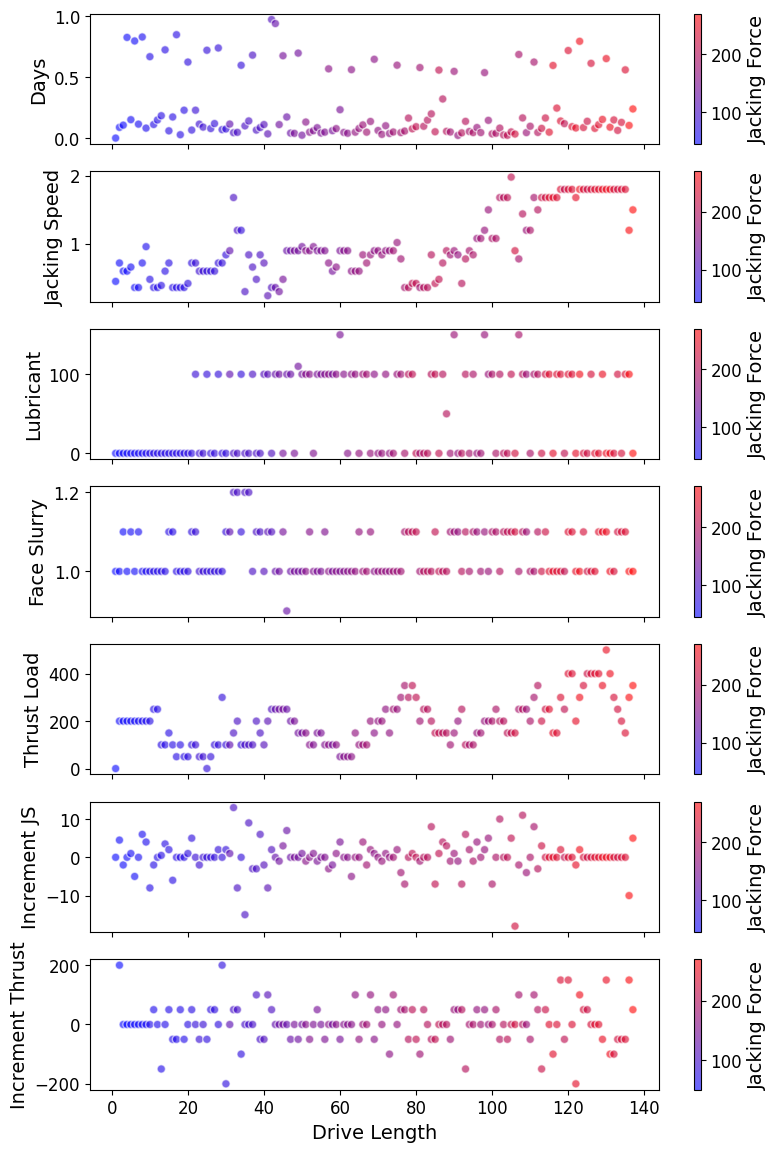

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Configure global font size
mpl.rcParams.update({'font.size': 12})  # Adjust as needed

# Load your data
data = pd.read_csv('./PJRecord_Sandstone_input.csv')  # Adjust the path to your CSV file

# Feature labels for plotting
labels = ['Days','Jacking Speed', 'Lubricant', 'Face Slurry', 'Thrust Load','Increment JS', 'Increment Thrust']

# Create a custom colormap from blue to red
colors = ["blue", "red"]
cmap = LinearSegmentedColormap.from_list("custom_blue_red", colors, N=256)

# Dimensions for A4 paper in inches (with some margin)
fig_width, fig_height = 8.27, 11.69

# Setting up the figure for bubble charts, with shared x-axis
fig, axes = plt.subplots(len(labels), 1, figsize=(fig_width, fig_height), sharex=True)

# Creating a bubble chart for each feature
for ax, feature in zip(axes, labels):
    # Scale bubble sizes for visibility, proportional to the 'Jacking force'
    # bubble_sizes = data['Jacking force'] * 2
    # Scatter plot with scaled bubble sizes and color mapped to 'Jacking force'
    scatter = ax.scatter(data['Drive length'], data[feature],
                         c=data['Jacking force'], cmap=cmap, alpha=0.6, edgecolors='w', marker='o')
    # ax.set_title(f"Bubble Chart of {feature} vs Drive Length with Jacking Force", fontsize=14)
    ax.set_ylabel(feature, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # Adding a colorbar to each subplot to indicate the 'Jacking Force' levels
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Jacking Force', size=14)
    cbar.ax.tick_params(labelsize=12)

# Set common x-axis label
axes[-1].set_xlabel('Drive Length', fontsize=14)

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('bubble_chart_A4.pdf', format='pdf', dpi=300)


<ipython-input-18-6afb0b3ff3d3>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make room for the colorbar


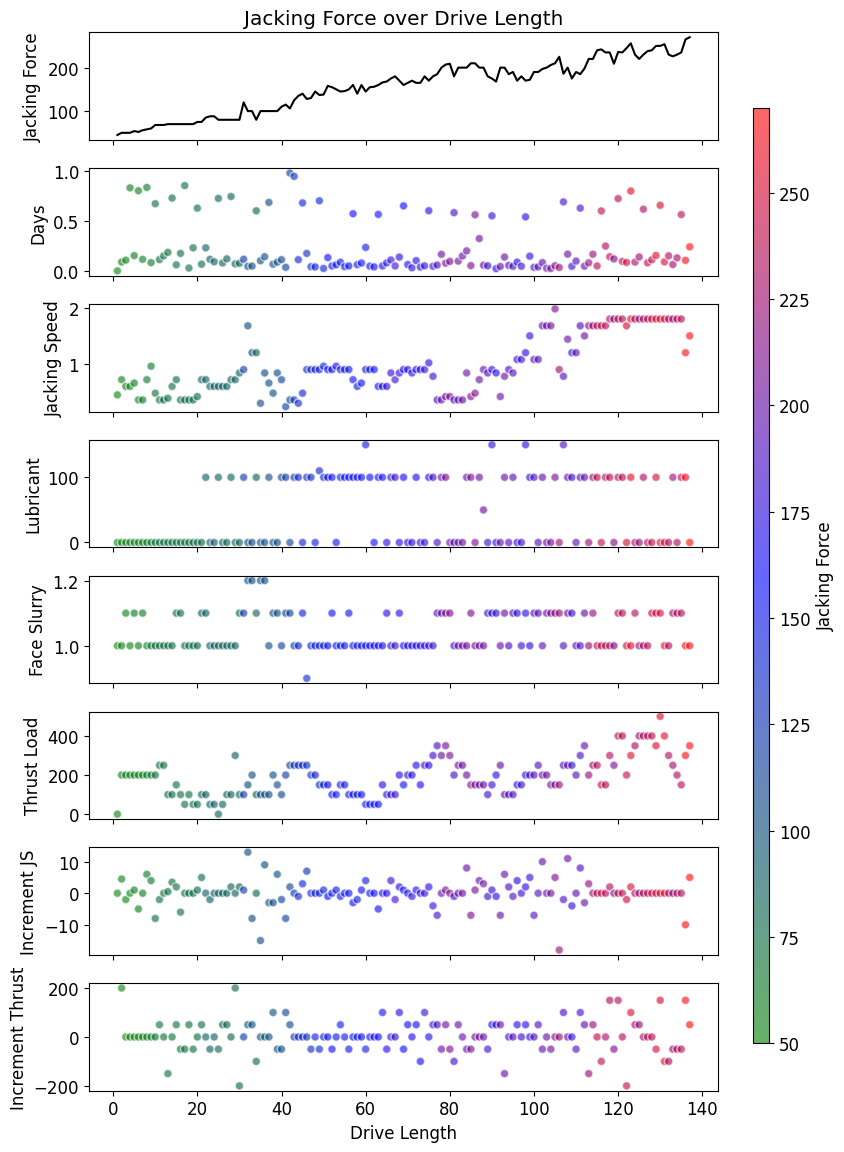

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Load your data
data = pd.read_csv('./PJRecord_Sandstone_input.csv')  # Adjust the path to your CSV file

# Create a custom traffic light colormap
colors = ["green", "blue", "red"]
cmap = LinearSegmentedColormap.from_list("traffic_light", colors, N=256)

# Feature labels for plotting
labels = ['Days','Jacking Speed', 'Lubricant', 'Face Slurry', 'Thrust Load','Increment JS', 'Increment Thrust']

# Setting up the figure for charts, with shared x-axis
fig, axes = plt.subplots(len(labels) + 1, 1, figsize=(8.27, 11.69), sharex=True)

# Adding a line plot for 'Jacking force' at the beginning
axes[0].plot(data['Drive length'], data['Jacking force'], label='Jacking Force', color='black')
axes[0].set_title('Jacking Force over Drive Length')
axes[0].set_ylabel('Jacking Force')

# Creating a scatter plot for each feature
for ax, feature in zip(axes[1:], labels):
    scatter = ax.scatter(data['Drive length'], data[feature], c=data['Jacking force'], cmap=cmap, alpha=0.6, edgecolors='w', marker='o')
    # ax.set_title(f"{feature} vs Drive Length")
    ax.set_ylabel(feature)

# Setting common x-axis label
axes[-1].set_xlabel('Drive Length')

# Adding a single colorbar for the whole figure
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust these values to fit the colorbar nicely next to your plots
fig.colorbar(scatter, cax=cbar_ax).set_label('Jacking Force')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make room for the colorbar
plt.show()

# Save the figure with high resolution
fig.savefig('traffic_light_chart_A4.pdf', format='pdf', dpi=300)


<ipython-input-20-e653c27714a0>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make room for the colorbar


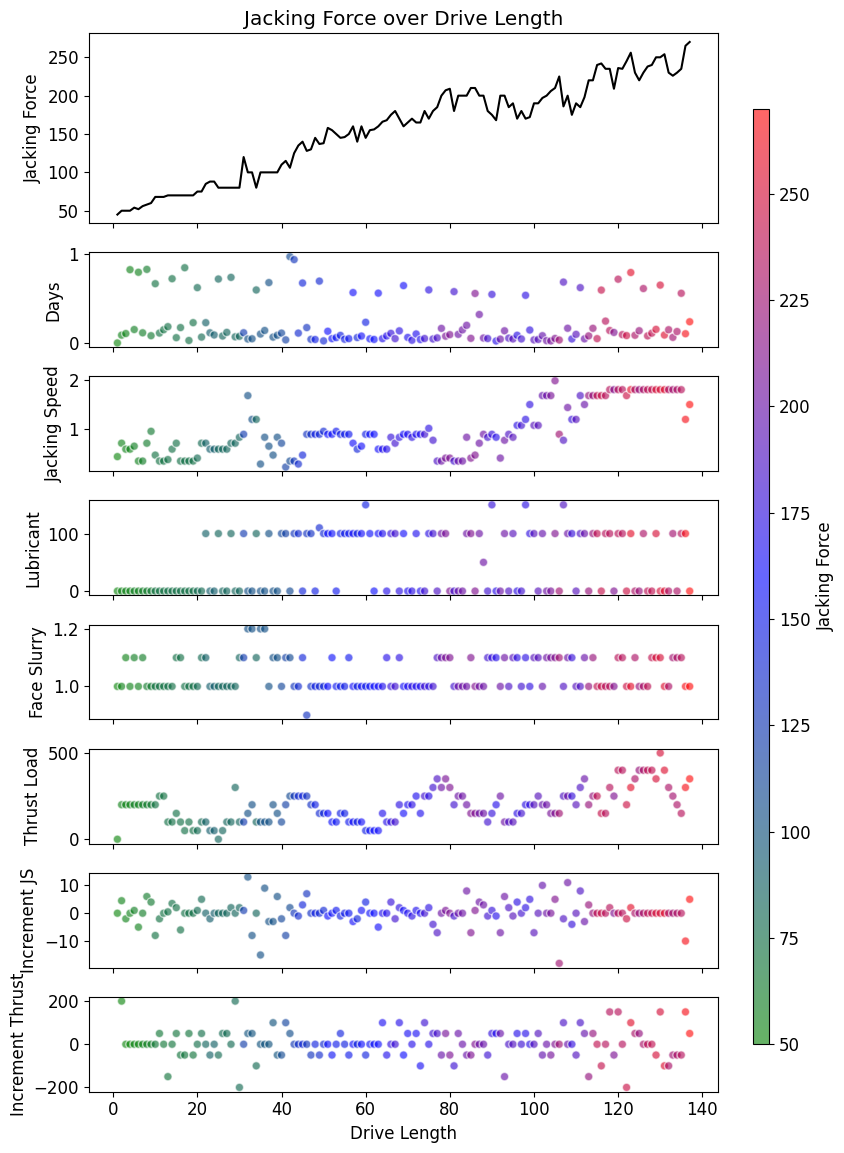

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Load your data
data = pd.read_csv('./PJRecord_Sandstone_input.csv')  # Adjust the path to your CSV file

# Create a custom traffic light colormap
colors = ["green", "blue", "red"]
cmap = LinearSegmentedColormap.from_list("traffic_light", colors, N=256)

# Feature labels for plotting
labels = ['Days', 'Jacking Speed', 'Lubricant', 'Face Slurry', 'Thrust Load', 'Increment JS', 'Increment Thrust']

# Determine the size ratios
height_ratios = [2] + [1] * len(labels)  # Giving 'Jacking Force' plot a larger height ratio

# Setting up the figure for charts, with shared x-axis and variable subplot sizes
fig, axes = plt.subplots(len(labels) + 1, 1, figsize=(8.27, 11.69), sharex=True,
                         gridspec_kw={'height_ratios': height_ratios})

# Adding a line plot for 'Jacking force' at the beginning
axes[0].plot(data['Drive length'], data['Jacking force'], label='Jacking Force', color='black')
axes[0].set_title('Jacking Force over Drive Length')
axes[0].set_ylabel('Jacking Force')

# Creating a scatter plot for each feature
for ax, feature in zip(axes[1:], labels):
    scatter = ax.scatter(data['Drive length'], data[feature], c=data['Jacking force'], cmap=cmap, alpha=0.6, edgecolors='w', marker='o')
    ax.set_ylabel(feature)

# Setting common x-axis label
axes[-1].set_xlabel('Drive Length')

# Adding a single colorbar for the whole figure
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust these values to fit the colorbar nicely next to your plots
fig.colorbar(scatter, cax=cbar_ax).set_label('Jacking Force')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make room for the colorbar
plt.show()

# Save the figure with high resolution
fig.savefig('traffic_light_chart_A4.pdf', format='pdf', dpi=300)


<ipython-input-34-8da440cf2bdf>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make room for the colorbar


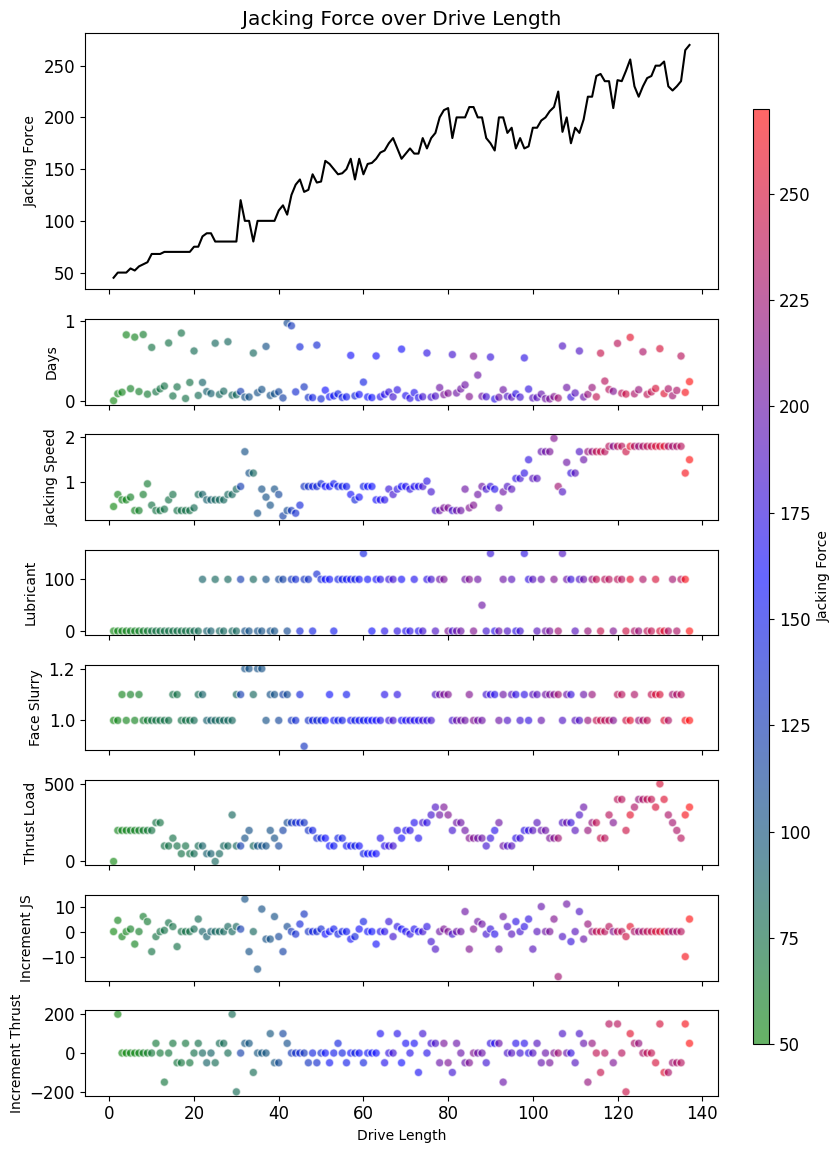

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Load your data
data = pd.read_csv('./PJRecord_Sandstone_input.csv')  # Adjust the path to your CSV file

# Create a custom traffic light colormap
colors = ["green", "blue", "red"]
cmap = LinearSegmentedColormap.from_list("traffic_light", colors, N=256)

# Feature labels for plotting
labels = ['Days', 'Jacking Speed', 'Lubricant', 'Face Slurry', 'Thrust Load', 'Increment JS', 'Increment Thrust']

# Determine the size ratios
height_ratios = [3] + [1] * len(labels)  # Giving 'Jacking Force' plot a larger height ratio

# Setting up the figure for charts, with shared x-axis and variable subplot sizes
fig, axes = plt.subplots(len(labels) + 1, 1, figsize=(8.27, 11.69), sharex=True, dpi=600,
                         gridspec_kw={'height_ratios': height_ratios})

# Adding a line plot for 'Jacking force' at the beginning
axes[0].plot(data['Drive length'], data['Jacking force'], label='Jacking Force', color='black')
axes[0].set_title('Jacking Force over Drive Length')
axes[0].set_ylabel('Jacking Force')

# Creating a scatter plot for each feature
for ax, feature in zip(axes[1:], labels):
    scatter = ax.scatter(data['Drive length'], data[feature], c=data['Jacking force'], cmap=cmap, alpha=0.6, edgecolors='w', marker='o')
    ax.set_ylabel(feature)
    ax.yaxis.label.set_rotation(90)  # Rotate the y-axis label

# Setting common x-axis label
axes[-1].set_xlabel('Drive Length')

# Adding a single colorbar for the whole figure
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust these values to fit the colorbar nicely next to your plots
fig.colorbar(scatter, cax=cbar_ax).set_label('Jacking Force')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make room for the colorbar
plt.show()

# Save the figure with high resolution
fig.savefig('traffic_light_chart_A4.pdf', format='pdf', dpi=300)


<ipython-input-33-32f784b136b8>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 0.9, 1])  # Adjust the right margin to make room for the colorbar


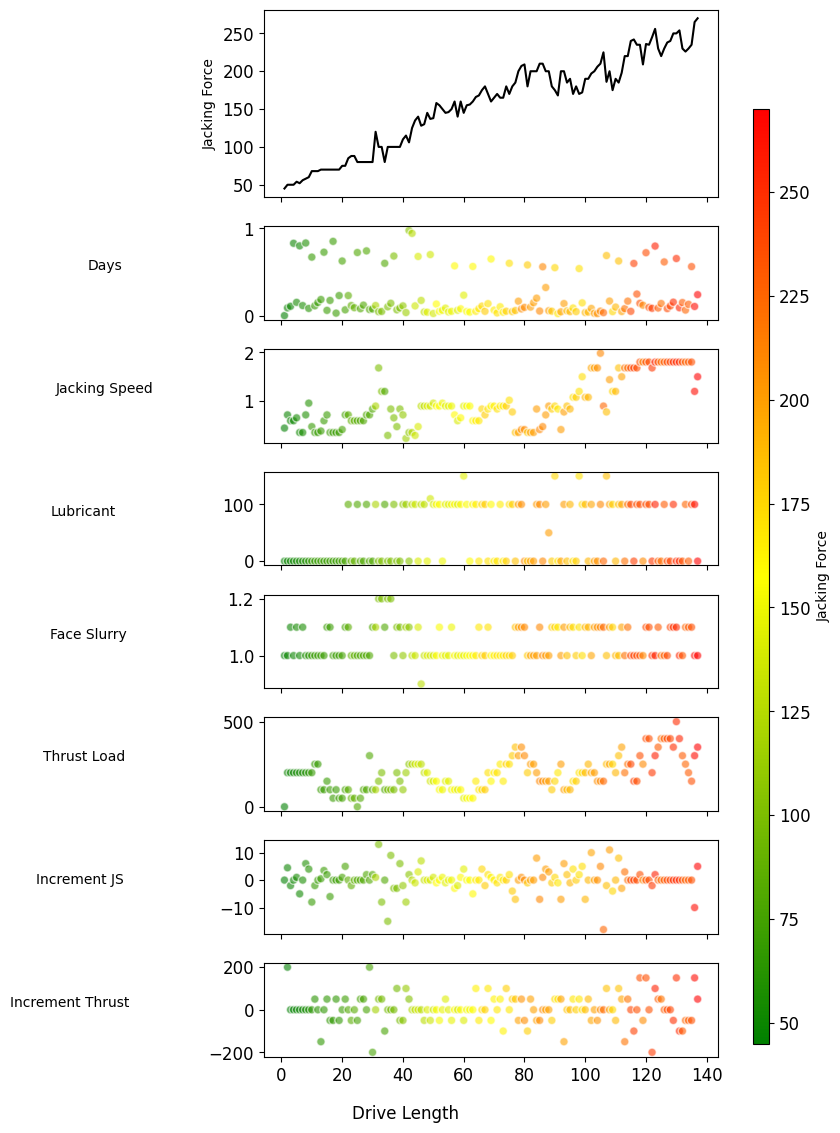

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Load the provided data
data = pd.read_csv('./PJRecord_Sandstone_input.csv')

# Create a custom traffic light colormap
colors = ["green", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("traffic_light", colors, N=256)

# Feature labels for plotting
labels = ['Days', 'Jacking Speed', 'Lubricant', 'Face Slurry', 'Thrust Load', 'Increment JS', 'Increment Thrust']

# Determine the size ratios
height_ratios = [3] + [1] * len(labels)  # Giving 'Jacking Force' plot a larger height ratio

# Adjust the subplot height ratios to allocate more space for the 'Jacking Force' plot
mpl.rcParams.update({'axes.labelsize': 10})  # Smaller label size to prevent overlap

# Setting up the figure for charts, with shared x-axis and variable subplot sizes
fig, axes = plt.subplots(len(labels) + 1, 1, figsize=(8.27, 11.69), sharex=True,
                         gridspec_kw={'height_ratios': [2] + [1 for _ in labels]})

# Adding a line plot for 'Jacking force' at the beginning
axes[0].plot(data['Drive length'], data['Jacking force'], label='Jacking Force', color='black')
axes[0].set_ylabel('Jacking Force')
axes[0].title.set_visible(False)

# Creating a scatter plot for each feature
for ax, feature in zip(axes[1:], labels):
    scatter = ax.scatter(data['Drive length'], data[feature], c=data['Jacking force'], cmap=cmap, alpha=0.6, edgecolors='w', marker='o')
    ax.set_ylabel(feature, rotation=0, labelpad=100)  # Rotate and adjust the label position

# Setting common x-axis label
fig.text(0.5, 0.04, 'Drive Length', ha='center', va='center')

# Adding a single colorbar for the whole figure
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=data['Jacking force'].min(), vmax=data['Jacking force'].max()))
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust these values to fit the colorbar nicely next to your plots
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Jacking Force')

plt.tight_layout(rect=[0, 0.05, 0.9, 1])  # Adjust the right margin to make room for the colorbar
plt.show()

# Save the figure with high resolution
fig.savefig('./traffic_light_chart_A4.pdf', format='pdf', dpi=300)



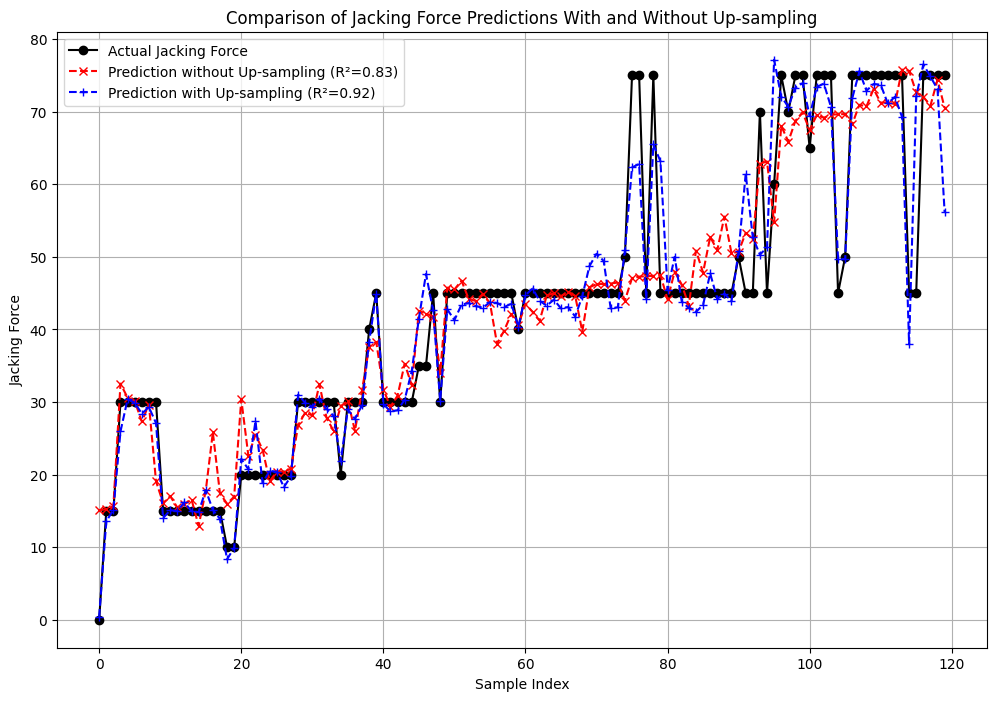

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the data from your Excel file
file_path = 'Compare with and without up sampling.xlsx'  # Replace 'path_to_your_file.xlsx' with the actual path to your Excel file
data = pd.read_excel(file_path)

# Calculate R-squared values
r2_without = r2_score(data['Jacking force'], data['Without up sampling'])
r2_with = r2_score(data['Jacking force'], data['With up sampling'])

# Plotting the predictions and actual jacking force
plt.figure(figsize=(12, 8))
plt.plot(data['Jacking force'], label='Actual Jacking Force', color='black', marker='o', linestyle='-')
plt.plot(data['Without up sampling'], label=f'Prediction without Up-sampling (R²={r2_without:.2f})', color='red', linestyle='--', marker='x')
plt.plot(data['With up sampling'], label=f'Prediction with Up-sampling (R²={r2_with:.2f})', color='blue', linestyle='--', marker='+')
plt.title('Comparison of Jacking Force Predictions With and Without Up-sampling')
plt.xlabel('Sample Index')
plt.ylabel('Jacking Force')
plt.legend()
plt.grid(True)
plt.show()


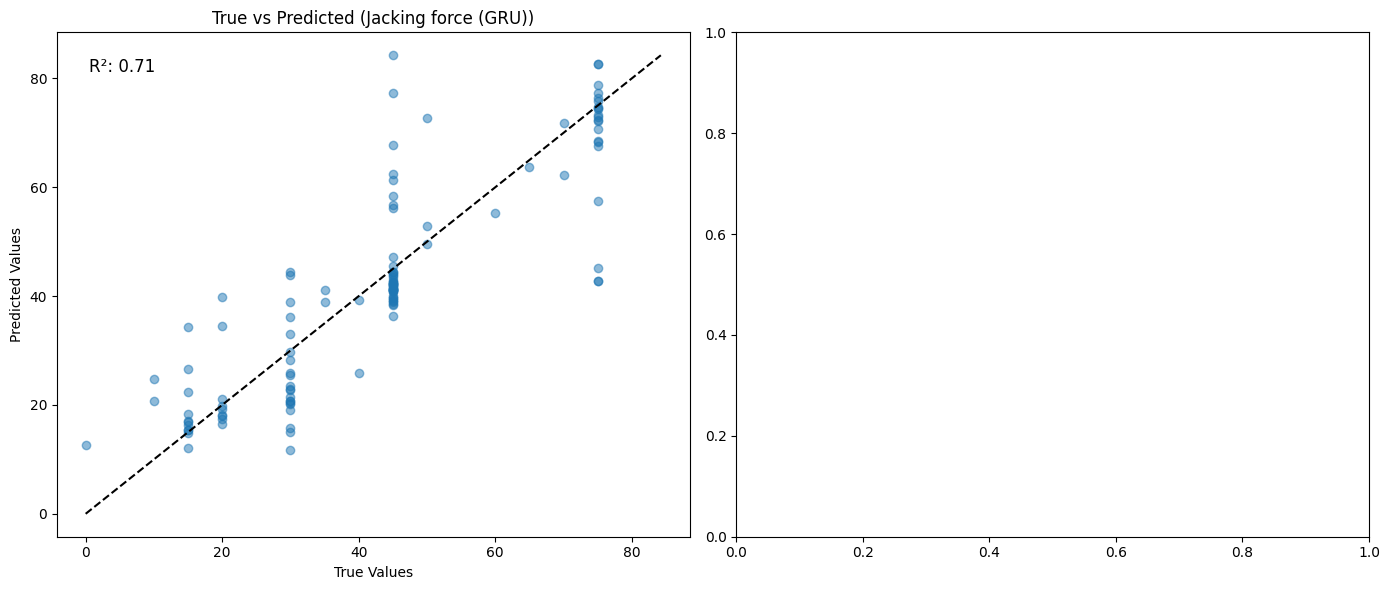

R-squared without up-sampling: 0.71377878926312


NameError: name 'r2_with' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the data
file_path = 'output_gru.csv'  # Replace with the path to your Excel file
data = pd.read_csv(file_path)

# Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting true values vs predicted values without up sampling
ax[0].scatter(data['Jacking force'], data['Jacking force (GRU)'], alpha=0.5)
ax[0].plot([data['Jacking force'].min(), data['Jacking force (GRU)'].max()],
           [data['Jacking force'].min(), data['Jacking force (GRU)'].max()], 'k--')
ax[0].set_title('True vs Predicted (Jacking force (GRU))')
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
r2_without = r2_score(data['Jacking force'], data['Jacking force (GRU)'])
ax[0].text(0.05, 0.95, f'R²: {r2_without:.2f}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')

# # Plotting true values vs predicted values with up sampling
# ax[1].scatter(data['Jacking force'], data['With up sampling'], alpha=0.5, color='r')
# ax[1].plot([data['Jacking force'].min(), data['Jacking force'].max()],
#            [data['Jacking force'].min(), data['Jacking force'].max()], 'k--')
# ax[1].set_title('True vs Predicted (With Up-sampling)')
# ax[1].set_xlabel('True Values')
# ax[1].set_ylabel('Predicted Values')
# r2_with = r2_score(data['Jacking force'], data['With up sampling'])
# ax[1].text(0.05, 0.95, f'R²: {r2_with:.2f}', transform=ax[1].transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

# Print R-squared values
print("R-squared without up-sampling:", r2_without)
# print("R-squared with up-sampling:", r2_with)


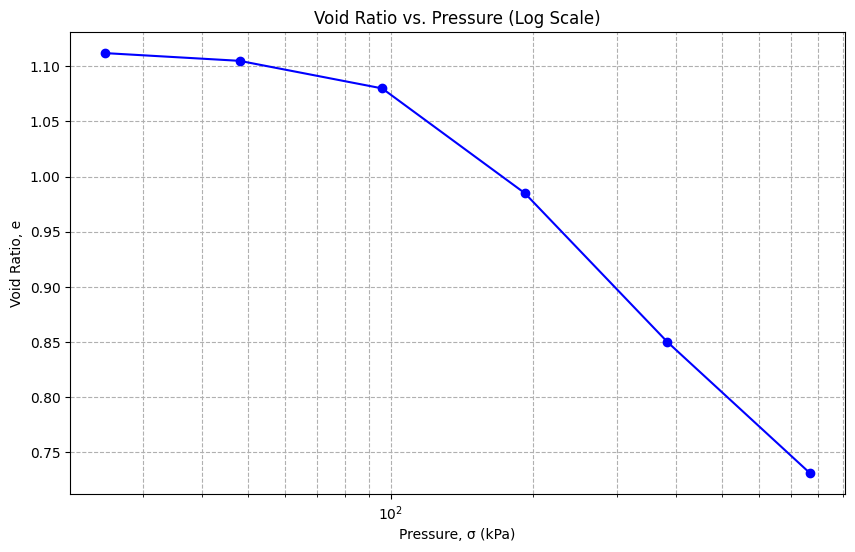

Compression Index (Cc): -0.4218848680506949


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
void_ratios = np.array([1.112, 1.105, 1.080, 0.985, 0.850, 0.731])
pressures = np.array([25, 48, 96, 192, 384, 768])

# Creating a semi-log plot for void ratio vs pressure
plt.figure(figsize=(10, 6))
plt.semilogx(pressures, void_ratios, marker='o', linestyle='-', color='b')
plt.title('Void Ratio vs. Pressure (Log Scale)')
plt.xlabel('Pressure, σ (kPa)')
plt.ylabel('Void Ratio, e')
plt.grid(True, which="both", ls="--")
plt.show()

# Selecting pressures and corresponding void ratios for Cc calculation
void_ratio_1, void_ratio_2 = 0.985, 0.731
pressure_1, pressure_2 = 192, 768

# Log of pressures
log_pressure_1 = np.log10(pressure_1)
log_pressure_2 = np.log10(pressure_2)

# Change in void ratio and log pressure
delta_e = void_ratio_1 - void_ratio_2
delta_log_sigma = log_pressure_1 - log_pressure_2

# Compression Index calculation
compression_index = delta_e / delta_log_sigma
print("Compression Index (Cc):", compression_index)
